In [3]:
from collections import Counter
from imblearn.over_sampling import *
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
#한글 폰트(맑은 고딕)적용
matplotlib.rc('font',family='Malgun Gothic') 

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.options.display.max_columns = 100

# # 보여지는 컬럼 개수 지정
# pd.set_option('display.max_columns', 30)
# pd.set_option('display.max_rows', 100)

import os
os.environ['PATH'] +=os.pathsep+'C:\Program Files (x86)\Graphviz2.38/bin/'

#의사결정나무 시각화
from sklearn.tree import export_graphviz
import graphviz

from sklearn.model_selection import train_test_split

#의사결정나무_예측 
from sklearn.tree import DecisionTreeRegressor

#의사결정나무_분류
from sklearn.tree import DecisionTreeClassifier

#랜덤포레스트_분류
from sklearn.ensemble import RandomForestClassifier

#그래디언트부스팅_분류
from sklearn.ensemble import GradientBoostingClassifier

#로지스틱 회귀분석_분류
from statsmodels.api import Logit


# import lightgbm
# from lightgbm import LGBMClassifier, plot_importance
# import xgboost as xgb
# from xgboost import XGBClassifier, plot_importance

# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.neural_network import MLPClassifier


#예측모델 평가
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

#모델 평가
from sklearn.metrics import classification_report 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score,roc_curve,auc

from sklearn.model_selection import GridSearchCV

#threshold 관련 추가
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import precision_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.preprocessing import Binarizer
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
import matplotlib.ticker as ticker

#catboost 관련 추가
from catboost import CatBoostClassifier, Pool
import time



# from matplotlib import font_manager, rc
# fontname = 'NanumGothic.ttf' 
# fontname = font_manager.FontProperties(fname=fontname).get_name()
# plt.style.use('seaborn-white')
# rc('font', family=fontname) 

In [4]:
# df_b = pd.read_csv('df_new_b.csv',engine = 'python',encoding='EUC-kr')
# df_c = pd.read_csv('df_new_p.csv',engine='python',encoding='EUC-kr')

df_b = pd.read_csv('final_business.csv')
df_c = pd.read_csv('final_personal.csv')

In [5]:
df_c.head()

,Unnamed: 0,고객ID,고객유형,생년,거주지,시,구군,남여구분,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부,연령대,계정수
0,0,66758234,개인,1979,경기도,경기도,평택시,여자,렌탈,일반,서비스 방문,10-20-2014,60,CMS,DES-1,96900,계약확정,0,없음,9,새마을금고,정상,40,1
1,1,66755948,개인,1982,경기도,경기도,평택시,남자,렌탈,교체렌탈,서비스 방문,10-20-2014,60,카드이체,DES-1,102900,계약확정,0,없음,2,현대카드,정상,30,2
2,2,66755948,개인,1982,경기도,경기도,평택시,남자,렌탈,프로모션,서비스 방문,12-09-2014,60,카드이체,DES-3A,90900,계약확정,0,없음,2,현대카드,정상,30,2
3,3,66756657,개인,1973,경기도,경기도,평택시,여자,렌탈,일반,홈쇼핑/방송,10-20-2014,60,CMS,DES-1,96900,계약확정,0,없음,8,우리은행,정상,40,1
4,4,66423450,개인,1982,경기도,경기도,포천시,남자,멤버십,멤버십S,렌탈재계약,10-20-2014,12,CMS,DES-1,66900,계약확정,0,없음,5,농협회원조합,정상,30,1


In [6]:
#연령대칼럼 수정
def div_age(row):
    age = (2015-row)+1
    result = str(age)[0]
    return result+'0'

df_c['연령대'] = df_c['생년'].apply(div_age)

In [7]:
df_c

,Unnamed: 0,고객ID,고객유형,생년,거주지,시,구군,남여구분,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부,연령대,계정수
0,0,66758234,개인,1979,경기도,경기도,평택시,여자,렌탈,일반,서비스 방문,10-20-2014,60,CMS,DES-1,96900,계약확정,0,없음,9,새마을금고,정상,30,1
1,1,66755948,개인,1982,경기도,경기도,평택시,남자,렌탈,교체렌탈,서비스 방문,10-20-2014,60,카드이체,DES-1,102900,계약확정,0,없음,2,현대카드,정상,30,2
2,2,66755948,개인,1982,경기도,경기도,평택시,남자,렌탈,프로모션,서비스 방문,12-09-2014,60,카드이체,DES-3A,90900,계약확정,0,없음,2,현대카드,정상,30,2
3,3,66756657,개인,1973,경기도,경기도,평택시,여자,렌탈,일반,홈쇼핑/방송,10-20-2014,60,CMS,DES-1,96900,계약확정,0,없음,8,우리은행,정상,40,1
4,4,66423450,개인,1982,경기도,경기도,포천시,남자,멤버십,멤버십S,렌탈재계약,10-20-2014,12,CMS,DES-1,66900,계약확정,0,없음,5,농협회원조합,정상,30,1
5,5,66423204,개인,1961,경기도,경기도,포천시,남자,멤버십,멤버십S,렌탈재계약,10-20-2014,12,CMS,DES-1,66900,해약확정,12,있음,8,농협회원조합,해약,50,1
6,6,66165241,개인,1968,경상도,경상도,포항시 남구,여자,렌탈,프로모션,서비스 방문,10-20-2014,60,CMS,DES-3A,90900,계약확정,0,없음,5,농협중앙회,정상,40,1
7,7,66751017,개인,1955,경상도,경상도,포항시 북구,남자,렌탈,통합 패키지,홈쇼핑/방송,10-20-2014,60,카드이체,DES-1,98400,계약확정,0,없음,1,롯데카드,정상,60,2
8,8,66751017,개인,1955,경상도,경상도,포항시 북구,남자,렌탈,통합 패키지,홈쇼핑/방송,10-20-2014,60,카드이체,DES-2,80400,계약확정,0,없음,1,롯데카드,정상,60,2
9,9,66758007,개인,1959,경상도,경상도,포항시 북구,여자,렌탈,일반,서비스 방문,10-20-2014,60,카드이체,DES-3A,102900,계약확정,0,없음,2,롯데카드,정상,50,1


# 1. df_c 데이터셋 df_c2로 정리 후 df_c_x, df_c_y 로 분할 - 변수 제거

In [8]:
df_c.head()

,Unnamed: 0,고객ID,고객유형,생년,거주지,시,구군,남여구분,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부,연령대,계정수
0,0,66758234,개인,1979,경기도,경기도,평택시,여자,렌탈,일반,서비스 방문,10-20-2014,60,CMS,DES-1,96900,계약확정,0,없음,9,새마을금고,정상,30,1
1,1,66755948,개인,1982,경기도,경기도,평택시,남자,렌탈,교체렌탈,서비스 방문,10-20-2014,60,카드이체,DES-1,102900,계약확정,0,없음,2,현대카드,정상,30,2
2,2,66755948,개인,1982,경기도,경기도,평택시,남자,렌탈,프로모션,서비스 방문,12-09-2014,60,카드이체,DES-3A,90900,계약확정,0,없음,2,현대카드,정상,30,2
3,3,66756657,개인,1973,경기도,경기도,평택시,여자,렌탈,일반,홈쇼핑/방송,10-20-2014,60,CMS,DES-1,96900,계약확정,0,없음,8,우리은행,정상,40,1
4,4,66423450,개인,1982,경기도,경기도,포천시,남자,멤버십,멤버십S,렌탈재계약,10-20-2014,12,CMS,DES-1,66900,계약확정,0,없음,5,농협회원조합,정상,30,1


In [9]:
df_c.columns

Index(['Unnamed: 0', '고객ID', '고객유형', '생년', '거주지', '시', '구군', '남여구분', '판매유형',
       '계약유형', '유통경로', '계약일', '계약기간', '납부유형', '제품군', '월랜탈비용', '계약상태', '연체건수',
       '연체여부', '신용등급', '결제은행', '해약여부', '연령대', '계정수'],
      dtype='object')

In [10]:
df_c['해약여부(clean)'] = df_c['해약여부']
df_c['해약여부(clean)'] = df_c['해약여부(clean)'].replace(['정상','해약'],[0,1])
df_c

,Unnamed: 0,고객ID,고객유형,생년,거주지,시,구군,남여구분,판매유형,계약유형,유통경로,계약일,계약기간,납부유형,제품군,월랜탈비용,계약상태,연체건수,연체여부,신용등급,결제은행,해약여부,연령대,계정수,해약여부(clean)
0,0,66758234,개인,1979,경기도,경기도,평택시,여자,렌탈,일반,서비스 방문,10-20-2014,60,CMS,DES-1,96900,계약확정,0,없음,9,새마을금고,정상,30,1,0
1,1,66755948,개인,1982,경기도,경기도,평택시,남자,렌탈,교체렌탈,서비스 방문,10-20-2014,60,카드이체,DES-1,102900,계약확정,0,없음,2,현대카드,정상,30,2,0
2,2,66755948,개인,1982,경기도,경기도,평택시,남자,렌탈,프로모션,서비스 방문,12-09-2014,60,카드이체,DES-3A,90900,계약확정,0,없음,2,현대카드,정상,30,2,0
3,3,66756657,개인,1973,경기도,경기도,평택시,여자,렌탈,일반,홈쇼핑/방송,10-20-2014,60,CMS,DES-1,96900,계약확정,0,없음,8,우리은행,정상,40,1,0
4,4,66423450,개인,1982,경기도,경기도,포천시,남자,멤버십,멤버십S,렌탈재계약,10-20-2014,12,CMS,DES-1,66900,계약확정,0,없음,5,농협회원조합,정상,30,1,0
5,5,66423204,개인,1961,경기도,경기도,포천시,남자,멤버십,멤버십S,렌탈재계약,10-20-2014,12,CMS,DES-1,66900,해약확정,12,있음,8,농협회원조합,해약,50,1,1
6,6,66165241,개인,1968,경상도,경상도,포항시 남구,여자,렌탈,프로모션,서비스 방문,10-20-2014,60,CMS,DES-3A,90900,계약확정,0,없음,5,농협중앙회,정상,40,1,0
7,7,66751017,개인,1955,경상도,경상도,포항시 북구,남자,렌탈,통합 패키지,홈쇼핑/방송,10-20-2014,60,카드이체,DES-1,98400,계약확정,0,없음,1,롯데카드,정상,60,2,0
8,8,66751017,개인,1955,경상도,경상도,포항시 북구,남자,렌탈,통합 패키지,홈쇼핑/방송,10-20-2014,60,카드이체,DES-2,80400,계약확정,0,없음,1,롯데카드,정상,60,2,0
9,9,66758007,개인,1959,경상도,경상도,포항시 북구,여자,렌탈,일반,서비스 방문,10-20-2014,60,카드이체,DES-3A,102900,계약확정,0,없음,2,롯데카드,정상,50,1,0


In [73]:
#변수 drop - 고객ID, 고객유형, 생년, 거주지, 시, 구군, 계약일, 계약상태, 연체여부, 결제은행, 해약여부, 계정수 
df_c.drop(['Unnamed: 0','고객ID','고객유형','생년','거주지','시','구군','계약일','계약상태','연체여부','결제은행','해약여부','계정수'],axis = 1, inplace = True)

In [11]:
#더미변수로 변환
df_c_dummy = pd.get_dummies(df_c)
df_c_dummy.head()

,Unnamed: 0,고객ID,생년,계약기간,월랜탈비용,연체건수,신용등급,계정수,해약여부(clean),고객유형_개인,거주지_강원도,거주지_경기도,거주지_경상도,거주지_서울특별시,거주지_전라도,거주지_제주도,거주지_충청도,시_강원도,시_경기도,시_경상도,시_광주광역시,시_대구광역시,시_대전광역시,시_부산광역시,시_서울특별시,시_세종자치시,시_울산광역시,시_인천광역시,시_전라도,시_제주도,시_충청도,구군_ 가평군,구군_ 강남구,구군_ 강동구,구군_ 강릉시,구군_ 강북구,구군_ 강서구,구군_ 강진군,구군_ 강화군,구군_ 거제시,구군_ 거창군,구군_ 경산시,구군_ 경주시,구군_ 계룡시,구군_ 계양구,구군_ 고령군,구군_ 고성군,구군_ 고양시 덕양구,구군_ 고양시 일산동구,구군_ 고양시 일산서구,...,결제은행_광주은행,결제은행_국민은행,결제은행_국민카드,결제은행_기업은행,결제은행_농협중앙회,결제은행_농협회원조합,결제은행_대구은행,결제은행_대신증권,결제은행_대우증권,결제은행_롯데카드,결제은행_메리츠종합금융증권,결제은행_미래에셋증권,결제은행_부산은행,결제은행_산림조합중앙회,결제은행_산업은행,결제은행_삼성증권,결제은행_삼성카드,결제은행_새마을금고,결제은행_수협중앙회,결제은행_수협카드,결제은행_신한금융투자,결제은행_신한은행,결제은행_신한카드,결제은행_신협중앙회,결제은행_씨티은행,결제은행_외환은행,결제은행_외환카드,결제은행_우리은행,결제은행_우리카드,결제은행_우체국,결제은행_유안타증권,결제은행_전북은행,결제은행_제주은행,결제은행_하나SK,결제은행_하나대투증권,결제은행_하나은행,결제은행_하이투자증권,결제은행_한국투자증권,결제은행_현대증권,결제은행_현대카드,해약여부_정상,해약여부_해약,연령대_20,연령대_30,연령대_40,연령대_50,연령대_60,연령대_70,연령대_80,연령대_90
0,0,66758234,1979,60,96900,0,9,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
1,1,66755948,1982,60,102900,0,2,2,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0
2,2,66755948,1982,60,90900,0,2,2,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0
3,3,66756657,1973,60,96900,0,8,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
4,4,66423450,1982,12,66900,0,5,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [75]:
#df_c_dummy 칼럼명 확인 
df_c_dummy.columns

Index(['계약기간', '월랜탈비용', '연체건수', '신용등급', '해약여부(clean)', '남여구분_남자', '남여구분_여자',
       '판매유형_렌탈', '판매유형_멤버십', '계약유형_교체렌탈', '계약유형_멤버십A', '계약유형_멤버십B',
       '계약유형_멤버십S', '계약유형_멥버십C', '계약유형_일반', '계약유형_통합 패키지', '계약유형_프로모션',
       '유통경로_기기구매', '유통경로_기타', '유통경로_렌탈재계약', '유통경로_렌탈총판', '유통경로_방문판매',
       '유통경로_온라인', '유통경로_전자랜드', '유통경로_하이마트', '유통경로_홈쇼핑', '납부유형_CMS',
       '납부유형_가상계좌', '납부유형_무통장', '납부유형_카드이체', '제품군_DES-1', '제품군_DES-2',
       '제품군_DES-3A', '제품군_DES-R4', '제품군_ERA', '제품군_MMC', '연령대_20', '연령대_30',
       '연령대_40', '연령대_50', '연령대_60', '연령대_70', '연령대_80', '연령대_90'],
      dtype='object')

In [76]:
#설명변수들로 이루어진 df_c_x , 종속변수로 이루어진 df_c_y 생성
df_c_x = df_c_dummy.drop(['해약여부(clean)'],axis=1)
df_c_x

,계약기간,월랜탈비용,연체건수,신용등급,남여구분_남자,남여구분_여자,판매유형_렌탈,판매유형_멤버십,계약유형_교체렌탈,계약유형_멤버십A,계약유형_멤버십B,계약유형_멤버십S,계약유형_멥버십C,계약유형_일반,계약유형_통합 패키지,...,납부유형_카드이체,제품군_DES-1,제품군_DES-2,제품군_DES-3A,제품군_DES-R4,제품군_ERA,제품군_MMC,연령대_20,연령대_30,연령대_40,연령대_50,연령대_60,연령대_70,연령대_80,연령대_90
0,60,96900,0,9,0,1,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,60,102900,0,2,1,0,1,0,1,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,60,90900,0,2,1,0,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,60,96900,0,8,0,1,1,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,12,66900,0,5,1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
5,12,66900,12,8,1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
6,60,90900,0,5,0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
7,60,98400,0,1,1,0,1,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0
8,60,80400,0,1,1,0,1,0,0,0,0,0,0,0,1,...,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
9,60,102900,0,2,0,1,1,0,0,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0


In [77]:
df_c_y=df_c_dummy['해약여부(clean)']
df_c_y

0        0
1        0
2        0
3        0
4        0
5        1
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
30       0
31       0
32       0
33       0
34       0
35       0
36       0
37       0
38       0
39       0
40       0
41       1
42       0
43       0
44       0
45       0
46       0
47       0
48       0
49       0
        ..
46219    1
46220    0
46221    0
46222    1
46223    0
46224    1
46225    1
46226    0
46227    1
46228    1
46229    1
46230    1
46231    0
46232    0
46233    1
46234    0
46235    0
46236    0
46237    0
46238    0
46239    1
46240    1
46241    0
46242    1
46243    0
46244    0
46245    1
46246    1
46247    1
46248    0
46249    1
46250    0
46251    1
46252    0
46253    1
46254    0
46255    1
46256    1
46257    1
46258    0

# 2. train데이터 셋과 test데이터 셋으로 분할

In [97]:
df_train_x, df_valid_x,df_train_y, df_valid_y = train_test_split(df_c_x, df_c_y, train_size=0.7, test_size = 0.3, random_state=1234)
df_valid_x, df_test_x, df_valid_y, df_test_y = train_test_split(df_valid_x, df_valid_y, train_size = 0.7, test_size = 0.3, random_state = 1234)

print('train data X size:{}'.format(df_train_x.shape))
print('train data Y size:{}'.format(df_train_y.shape))
print('ValidationTest data X size:{}'.format(df_valid_x.shape))
print('ValidationTest data Y size:{}'.format(df_valid_y.shape))
print('test data X size:{}'.format(df_test_x.shape))
print('test data Y size:{}'.format(df_test_y.shape))


train data X size:(32388, 43)
train data Y size:(32388,)
ValidationTest data X size:(9716, 43)
ValidationTest data Y size:(9716,)
test data X size:(4165, 43)
test data Y size:(4165,)


In [98]:
# Stratify 방법 
# #train dataset과 test dataset 7:3으로 나눔
# df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_c_x,df_c_y,test_size=0.3,random_state=1234,stratify=df_c_y)

# print('train data X size:{}'.format(df_train_x.shape))
# print('train data Y size:{}'.format(df_train_y.shape))
# print('test data X size:{}'.format(df_test_x.shape))
# print('test data Y size:{}'.format(df_test_y.shape))

In [99]:
Counter(df_train_y),Counter(df_valid_y),Counter(df_test_y)

(Counter({0: 31746, 1: 642}),
 Counter({0: 9527, 1: 189}),
 Counter({0: 4093, 1: 72}))

In [100]:
#train_y 데이터 값의 비율 - 각각 98%, 2%의 비율 차지 
np.array(list(Counter(df_train_y).values())) / len(df_train_y)

array([0.98017784, 0.01982216])

In [101]:
#valid_y 데이터 값의 비율  
np.array(list(Counter(df_valid_y).values())) / len(df_valid_y)

array([0.98054755, 0.01945245])

In [102]:
#test_y 데이터 값의 비율 
np.array(list(Counter(df_test_y).values())) / len(df_test_y)

array([0.98271309, 0.01728691])

In [103]:
#SMOTE
smote = SMOTE()
x_resampled, y_resampled = smote.fit_sample(df_train_x,df_train_y)

In [104]:
#x_resampled 와 x_resampled_df 구분 ! 
x_resampled_df = pd.DataFrame(data= x_resampled, columns =df_train_x.columns)

# 3. 의사결정나무(DT) - 기본, 클래스가중치, threshold, SMOTE 샘플링

In [89]:
#GridSerchCV

para_split = [n_split*10 for n_split in range(2,5)]
para_leaf = [n_leaf*2 for n_leaf in range(5,15)]
para_depth = [depth for depth in range(3,10)]

estimator = DecisionTreeClassifier(class_weight ={0:0.2,1:0.8},random_state=1234)

param_grid = {'max_depth':para_depth,'min_samples_split':para_split,'min_samples_leaf':para_leaf}

grid_dt = GridSearchCV(estimator,param_grid,scoring='accuracy',n_jobs=-1)
grid_dt.fit(df_train_x,df_train_y)

print('best estimator model:\n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_dt.best_params_))
print('\nbest score:\n{}'.format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model:
DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

best parameter:
{'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 20}

best score:
0.986


### 3- 1. 기본 DT

In [91]:
# 기본 모델 생성 및 정확도,정밀도,재현율 확인

dt = DecisionTreeClassifier(random_state=1234, max_depth=3,min_samples_leaf =10 , min_samples_split = 20)
dt.fit(df_train_x,df_train_y)
y_pred = dt.predict(df_valid_x)

print('Accuracy: {0}'.format(accuracy_score(df_valid_y,y_pred)))
print(classification_report(df_valid_y,y_pred,target_names = ['0','1']))

Accuracy: 0.9881852892442907
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13628
           1       0.75      0.53      0.62       253

    accuracy                           0.99     13881
   macro avg       0.87      0.76      0.81     13881
weighted avg       0.99      0.99      0.99     13881



### 3- 2. 클래스 가중치 (0.2 : 0.8)

In [92]:
# 클래스 가중치 + 모델 생성 및 정확도,정밀도,재현율 확인

dt = DecisionTreeClassifier(class_weight ={0:0.2,1:0.8},random_state=1234, max_depth=3,min_samples_leaf =10 , min_samples_split = 20)
dt.fit(df_train_x,df_train_y)
y_pred = dt.predict(df_valid_x)
print('Accuracy: {0}'.format(accuracy_score(df_valid_y,y_pred)))



print(classification_report(df_valid_y,y_pred,target_names = ['0','1']))

Accuracy: 0.9881852892442907
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13628
           1       0.75      0.53      0.62       253

    accuracy                           0.99     13881
   macro avg       0.87      0.76      0.81     13881
weighted avg       0.99      0.99      0.99     13881



### 3-3. Threshold 처리 

In [93]:
#threshold 선택
dt = DecisionTreeClassifier(random_state=1234, max_depth=3,min_samples_leaf =10 , min_samples_split = 20)
dt.fit(df_train_x,df_train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1234, splitter='best')

In [94]:
def precision_recall_curve_plot (y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    f1_score = (2*racalls*precisions)/(recalls+precisions)
    
    #x축을 theshold 값으로, y축을 각각 정밀도, 재현율로
    plt.figure(figsize = (12,6))
    threshold_boundary = thresholds.shape[0] 
    plt.plot(thresholds, precisions[0:threshold_boundary],linestyle='--',label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label = 'recall')
    plt.plot(thresholds, f1_score[0:threshold_boundary],label = 'f1_score')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall')
    plt.show()

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


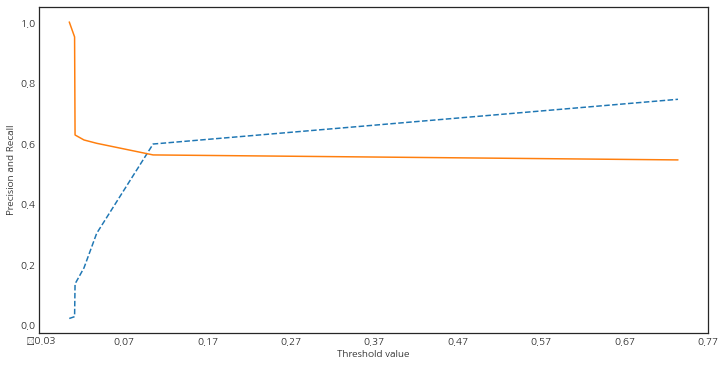

In [95]:
precision_recall_curve_plot(df_valid_y, dt.predict_proba(df_valid_x)[:,1])

In [96]:
#threshold 0.25 + 모델 생성 및 정확도,정밀도,재현율 확인
dt = DecisionTreeClassifier(random_state=1234, max_depth=3,min_samples_leaf =10 , min_samples_split = 20)
dt.fit(df_train_x,df_train_y)

pred_proba = dt.predict_proba(df_valid_x)
pred_proba_1 = pred_proba[:,1].reshape(-1,1) 

binarizer = Binarizer(threshold=0.67).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

print('Accuracy: {0}'.format(accuracy_score(df_valid_y,custom_predict)))
print(classification_report(df_valid_y,custom_predict,target_names = ['0','1']))

Accuracy: 0.9881852892442907
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13628
           1       0.75      0.53      0.62       253

    accuracy                           0.99     13881
   macro avg       0.87      0.76      0.81     13881
weighted avg       0.99      0.99      0.99     13881



### 3-4. SMOTE 샘플링 

In [56]:
#smote + 모델 생성 및 정확도,정밀도,재현율 확인

dt = DecisionTreeClassifier(random_state=1234, max_depth=3,min_samples_leaf =10 , min_samples_split = 20)
dt.fit(x_resampled,y_resampled)
y_pred = dt.predict(df_valid_x)

print('Accuracy: {0}'.format(accuracy_score(df_valid_y,y_pred)))
print(classification_report(df_valid_y,y_pred,target_names = ['0','1']))

Accuracy: 0.943231755637202
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     13610
           1       0.18      0.56      0.28       271

    accuracy                           0.94     13881
   macro avg       0.59      0.75      0.62     13881
weighted avg       0.98      0.94      0.96     13881



# 4. 랜덤 포레스트(RF) - 기본, 클래스 가중치, threshold, SMOTE샘플링  

### 4-0 파라미터 찾기

In [106]:
# #GridSerchCV - 오래걸림

# para_n_tree = [n_tree*5 for n_tree in range(1,20)]
# para_split = [n_split*10 for n_split in range(2,5)]
# para_leaf = [n_leaf*2 for n_leaf in range(8,15)]
# para_depth = [depth for depth in range(3,10)]




# estimator = RandomForestClassifier(random_state=1234)

# param_grid = {'max_depth':para_depth,'n_estimators':para_n_tree,'min_samples_split':para_split,'min_samples_leaf':para_leaf}

# grid_dt = GridSearchCV(estimator,param_grid,scoring='accuracy',n_jobs=-1)
# grid_dt.fit(df_train_x,df_train_y)

# print('best estimator model:\n{}'.format(grid_dt.best_estimator_))
# print('\nbest parameter:\n{}'.format(grid_dt.best_params_))
# print('\nbest score:\n{}'.format(grid_dt.best_score_.round(3)))

In [108]:
 #n_estimators
train_accuracy = []; valid_accuracy=[]

para_n_tree = [n_tree*10 for n_tree in range(1,20)]

for v_n_estimators in para_n_tree:
    rf = RandomForestClassifier(random_state = 1234, n_estimators=v_n_estimators)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    valid_accuracy.append(rf.score(df_valid_x,df_valid_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['ValidAccuracy'] = valid_accuracy
df_accuracy_n['Difference'] = df_accuracy_n['TrainAccuracy']-df_accuracy_n['ValidAccuracy']
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy,Difference
0,10,0.988,0.984,0.004
1,20,0.988,0.985,0.004
2,30,0.989,0.985,0.004
3,40,0.989,0.985,0.004
4,50,0.989,0.985,0.004
5,60,0.989,0.985,0.004
6,70,0.989,0.985,0.004
7,80,0.989,0.985,0.004
8,90,0.989,0.985,0.004
9,100,0.989,0.985,0.004


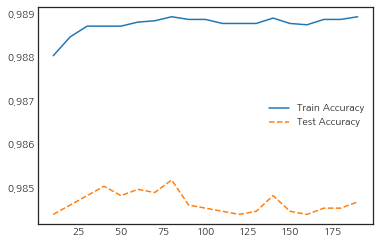

In [109]:
plt.plot(para_n_tree ,train_accuracy,linestyle='-',label = 'Train Accuracy')
plt.plot(para_n_tree ,valid_accuracy,linestyle = '--',label = 'Valid Accuracy')
plt.legend()
#80

In [113]:
#depth
train_accuracy = []; valid_accuracy=[]

para_depth = [depth for depth in range(3,10)]

for v_max_depth in para_depth:
    rf = RandomForestClassifier(random_state = 1234,n_estimators =80,  max_depth=v_max_depth)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    valid_accuracy.append(rf.score(df_valid_x,df_valid_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['ValidAccuracy'] = valid_accuracy
df_accuracy_depth['Difference'] = df_accuracy_depth['TrainAccuracy']-df_accuracy_depth['ValidAccuracy']
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy,Difference
0,3,0.982,0.980,0.002
1,4,0.982,0.980,0.002
2,5,0.983,0.982,0.001
3,6,0.984,0.983,0.002
4,7,0.986,0.985,0.001
5,8,0.986,0.986,0.001
6,9,0.987,0.986,0.001


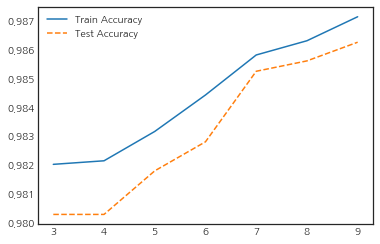

In [114]:
plt.plot(para_depth,train_accuracy,linestyle='-',label = 'Train Accuracy')
plt.plot(para_depth,valid_accuracy,linestyle = '--',label = 'Valid Accuracy')
plt.legend()
#7

In [115]:
#split
train_accuracy = []; valid_accuracy=[]

para_split = [n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    rf = RandomForestClassifier(class_weight ={0:0.2,1:0.8},random_state = 1234, n_estimators =80,min_samples_split=v_min_samples_split,max_depth=7)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
df_accuracy_split= pd.DataFrame()
df_accuracy_split['MinsamplesSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy
df_accuracy_split['Difference'] = df_accuracy_split['TrainAccuracy']-df_accuracy_split['TestAccuracy']
df_accuracy_split.round(3)

,MinsamplesSplit,TrainAccuracy,TestAccuracy,Difference
0,10,0.986,0.984,0.001
1,20,0.985,0.984,0.001
2,30,0.985,0.984,0.001
3,40,0.985,0.985,0.001
4,50,0.985,0.985,0.001
5,60,0.985,0.984,0.001
6,70,0.985,0.984,0.001
7,80,0.985,0.984,0.001
8,90,0.985,0.984,0.001
9,100,0.985,0.984,0.001


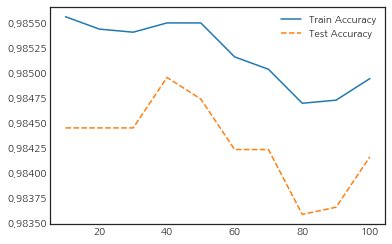

In [116]:
plt.plot(para_split,train_accuracy,linestyle='-',label = 'Train Accuracy')
plt.plot(para_split,test_accuracy,linestyle = '--',label = 'Test Accuracy')
plt.legend()
#40

In [117]:
#min_samples_leaf
train_accuracy = []; test_accuracy=[]

para_leaf = [n_leaf*2 for n_leaf in range(8,15)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestClassifier(class_weight ={0:0.2,1:0.8},random_state = 1234, n_estimators =80,min_samples_split=40,max_depth=7,\
                                 min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
    
df_accuracy_leaf= pd.DataFrame()
df_accuracy_leaf['MinsamplesLeaf'] = para_leaf
df_accuracy_leaf['TrainAccuracy'] = train_accuracy
df_accuracy_leaf['TestAccuracy'] = test_accuracy
df_accuracy_leaf['Difference'] = df_accuracy_leaf['TrainAccuracy']-df_accuracy_leaf['TestAccuracy']
df_accuracy_leaf.round(3)

,MinsamplesLeaf,TrainAccuracy,TestAccuracy,Difference
0,16,0.982,0.980,0.002
1,18,0.982,0.981,0.001
2,20,0.982,0.981,0.001
3,22,0.984,0.982,0.001
4,24,0.982,0.981,0.001
5,26,0.982,0.981,0.001
6,28,0.982,0.980,0.002


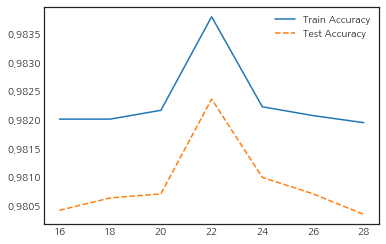

In [118]:
plt.plot(para_leaf,train_accuracy,linestyle='-',label = 'Train Accuracy')
plt.plot(para_leaf,test_accuracy,linestyle = '--',label = 'Test Accuracy')
plt.legend()
# 22

### 4-1. 기본

In [57]:
# 기본 모델 생성 및 정확도,정밀도,재현율 확인

rf = RandomForestClassifier(random_state=1234,n_estimators=80, max_depth=7,min_samples_leaf =22 , min_samples_split = 40)
rf.fit(df_train_x,df_train_y)

y_pred = rf.predict(df_test_x)
print('Accuracy: {0}'.format(accuracy_score(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,target_names = ['0','1']))

Accuracy: 0.9885454938405014
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13610
           1       1.00      0.41      0.58       271

    accuracy                           0.99     13881
   macro avg       0.99      0.71      0.79     13881
weighted avg       0.99      0.99      0.99     13881



### 4-2. 클래스 가중치 (0.2 : 0.8)

In [63]:
# 모델 생성 및 정확도,정밀도,재현율 확인
rf = RandomForestClassifier(class_weight ={0:0.4,1:0.6},random_state=1234,n_estimators=80, max_depth=7,min_samples_leaf =22 , min_samples_split = 40)
rf.fit(df_train_x,df_train_y)
y_pred = rf.predict(df_test_x)
print('Accuracy: {0}'.format(accuracy_score(df_test_y,y_pred)))

print(classification_report(df_test_y,y_pred,target_names = ['0','1']))

Accuracy: 0.9885454938405014
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13610
           1       1.00      0.41      0.58       271

    accuracy                           0.99     13881
   macro avg       0.99      0.71      0.79     13881
weighted avg       0.99      0.99      0.99     13881



### 4-3. Threshold 처리 

In [64]:
#threshold 선택
rf= RandomForestClassifier(random_state=1234,n_estimators=80, max_depth=7,min_samples_leaf =22 , min_samples_split = 40)
rf.fit(df_train_x,df_train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=22, min_samples_split=40,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


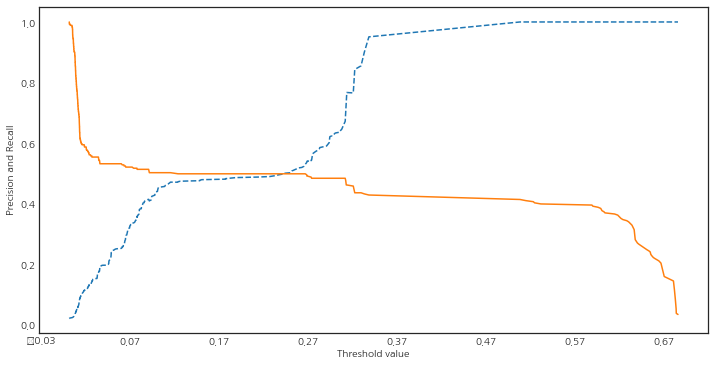

In [65]:
def precision_recall_curve_plot (y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    #x축을 theshold 값으로, y축을 각각 정밀도, 재현율로
    plt.figure(figsize = (12,6))
    threshold_boundary = thresholds.shape[0] #147?
    plt.plot(thresholds, precisions[0:threshold_boundary],linestyle='--',label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label = 'recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall')
    plt.show()

    
precision_recall_curve_plot(df_test_y, rf.predict_proba(df_test_x)[:,1])
#0.15

In [71]:
#threshold 0.35 + 모델 생성 및 정확도,정밀도,재현율 확인
rf= RandomForestClassifier(random_state=1234,n_estimators=80, max_depth=7,min_samples_leaf =22 , min_samples_split = 40)
rf.fit(df_train_x,df_train_y)

pred_proba = rf.predict_proba(df_test_x)
pred_proba_1 = pred_proba[:,1].reshape(-1,1) 

binarizer = Binarizer(threshold=0.35).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

print('Accuracy: {0}'.format(accuracy_score(df_test_y,custom_predict)))
print(classification_report(df_test_y,custom_predict,target_names = ['0','1']))

Accuracy: 0.9885454938405014
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13610
           1       1.00      0.41      0.58       271

    accuracy                           0.99     13881
   macro avg       0.99      0.71      0.79     13881
weighted avg       0.99      0.99      0.99     13881



### 4-4. SMOTE 샘플링

In [72]:
#smote + 모델 생성 및 정확도,정밀도,재현율 확인
rf = RandomForestClassifier(random_state=1234,n_estimators=80, max_depth=7,min_samples_leaf =22 , min_samples_split = 40)
rf.fit(x_resampled,y_resampled)
y_pred = rf.predict(df_test_x)
print('Accuracy: {0}'.format(accuracy_score(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,target_names = ['0','1']))

Accuracy: 0.9504358475614149
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     13610
           1       0.21      0.55      0.30       271

    accuracy                           0.95     13881
   macro avg       0.60      0.76      0.64     13881
weighted avg       0.98      0.95      0.96     13881



### 4-5 SMOTE+thr

In [74]:
rf= RandomForestClassifier(random_state=1234,n_estimators=80, max_depth=7,min_samples_leaf =22 , min_samples_split = 40)
rf.fit(x_resampled,y_resampled)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=22, min_samples_split=40,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


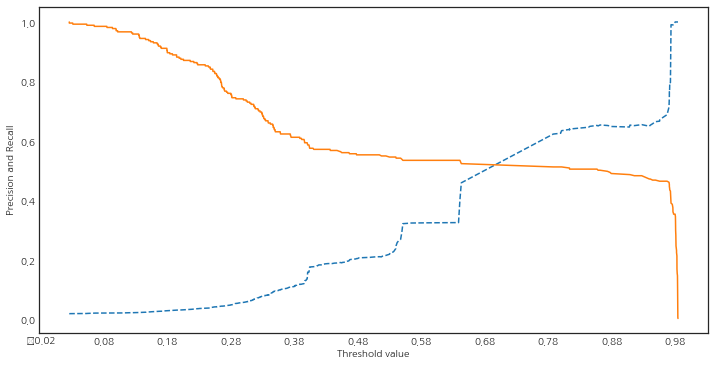

In [75]:
def precision_recall_curve_plot (y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    #x축을 theshold 값으로, y축을 각각 정밀도, 재현율로
    plt.figure(figsize = (12,6))
    threshold_boundary = thresholds.shape[0] #147?
    plt.plot(thresholds, precisions[0:threshold_boundary],linestyle='--',label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label = 'recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall')
    plt.show()

    
precision_recall_curve_plot(df_test_y, rf.predict_proba(df_test_x)[:,1])

In [77]:
#threshold 0.73 + 모델 생성 및 정확도,정밀도,재현율 확인
rf= RandomForestClassifier(random_state=1234,n_estimators=80, max_depth=7,min_samples_leaf =22 , min_samples_split = 40)
rf.fit(x_resampled,y_resampled)

pred_proba = rf.predict_proba(df_test_x)
pred_proba_1 = pred_proba[:,1].reshape(-1,1) 

binarizer = Binarizer(threshold=0.73).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

print('Accuracy: {0}'.format(accuracy_score(df_test_y,custom_predict)))
print(classification_report(df_test_y,custom_predict,target_names = ['0','1']))

Accuracy: 0.9844391614437
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13610
           1       0.62      0.51      0.56       271

    accuracy                           0.98     13881
   macro avg       0.81      0.75      0.78     13881
weighted avg       0.98      0.98      0.98     13881



# 5. 그래디언트부스팅(GB) - 기본, threshold, SMOTE샘플링 

### 5-0. 파라미터

In [126]:
#learning_rate
train_accuracy = []; test_accuracy=[]

para_lr= [lr*0.1 for lr in range(1,5)]

for v_learning_rate in para_lr:
    gb = GradientBoostingClassifier(random_state = 1234, learning_rate=v_learning_rate)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['LearningRate'] = para_lr
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy
df_accuracy_n['Difference'] = df_accuracy_n['TrainAccuracy']-df_accuracy_n['TestAccuracy']
df_accuracy_n.round(3)

,LearningRate,TrainAccuracy,TestAccuracy,Difference
0,0.1,0.989,0.989,0.000
1,0.2,0.989,0.988,0.001
2,0.3,0.989,0.988,0.001
3,0.4,0.989,0.989,0.001


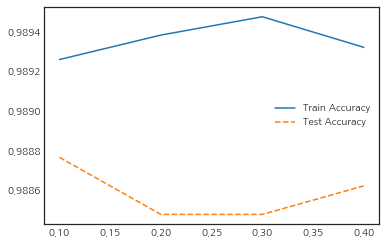

In [127]:
plt.plot(para_lr ,train_accuracy,linestyle='-',label = 'Train Accuracy')
plt.plot(para_lr ,test_accuracy,linestyle = '--',label = 'Test Accuracy')
plt.legend()
#0.1

In [128]:
 #n_estimators
train_accuracy = []; test_accuracy=[]

para_n_tree = [n_tree*10 for n_tree in range(9,20)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingClassifier(learning_rate=0.1,random_state = 1234, n_estimators=v_n_estimators)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimators'] = para_n_tree
df_accuracy_n['TrainAccuracy'] = train_accuracy
df_accuracy_n['TestAccuracy'] = test_accuracy
df_accuracy_n['Difference'] = df_accuracy_n['TrainAccuracy']-df_accuracy_n['TestAccuracy']
df_accuracy_n.round(3)

,n_estimators,TrainAccuracy,TestAccuracy,Difference
0,90,0.989,0.989,0.000
1,100,0.989,0.989,0.000
2,110,0.989,0.989,0.000
3,120,0.989,0.989,0.001
4,130,0.989,0.989,0.001
5,140,0.989,0.989,0.001
6,150,0.989,0.989,0.001
7,160,0.989,0.989,0.001
8,170,0.989,0.989,0.001
9,180,0.989,0.989,0.001


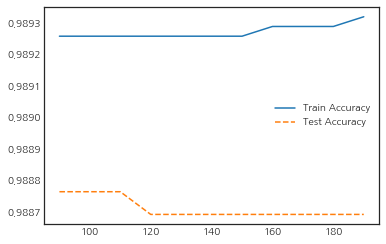

In [129]:
plt.plot(para_n_tree ,train_accuracy,linestyle='-',label = 'Train Accuracy')
plt.plot(para_n_tree ,test_accuracy,linestyle = '--',label = 'Test Accuracy')
plt.legend()
#100

In [130]:
#depth
train_accuracy = []; test_accuracy=[]

para_depth = [depth for depth in range(3,10)]

for v_max_depth in para_depth:
    gb = GradientBoostingClassifier(learning_rate=0.1, random_state = 1234,n_estimators =100,  max_depth=v_max_depth)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))

df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['Depth'] = para_depth
df_accuracy_depth['TrainAccuracy'] = train_accuracy
df_accuracy_depth['TestAccuracy'] = test_accuracy
df_accuracy_depth['Difference'] = df_accuracy_depth['TrainAccuracy']-df_accuracy_depth['TestAccuracy']
df_accuracy_depth.round(3)

,Depth,TrainAccuracy,TestAccuracy,Difference
0,3,0.989,0.989,0.000
1,4,0.990,0.989,0.001
2,5,0.990,0.988,0.001
3,6,0.990,0.988,0.002
4,7,0.990,0.988,0.002
5,8,0.990,0.988,0.002
6,9,0.991,0.987,0.003


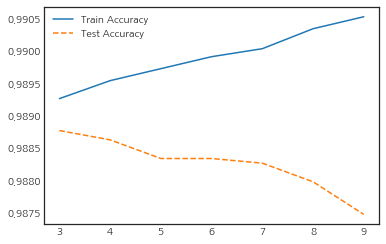

In [131]:
plt.plot(para_depth ,train_accuracy,linestyle='-',label = 'Train Accuracy')
plt.plot(para_depth ,test_accuracy,linestyle = '--',label = 'Test Accuracy')
plt.legend()
#4

In [132]:
#split
train_accuracy = []; test_accuracy=[]

para_split = [n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    gb = GradientBoostingClassifier(learning_rate=0.1, random_state = 1234, n_estimators =100,min_samples_split=v_min_samples_split,max_depth=4)
    gb.fit(df_train_x,df_train_y)
    train_accuracy.append(gb.score(df_train_x,df_train_y))
    test_accuracy.append(gb.score(df_test_x,df_test_y))
    
df_accuracy_split= pd.DataFrame()
df_accuracy_split['MinsamplesSplit'] = para_split
df_accuracy_split['TrainAccuracy'] = train_accuracy
df_accuracy_split['TestAccuracy'] = test_accuracy
df_accuracy_split['Difference'] = df_accuracy_split['TrainAccuracy']-df_accuracy_split['TestAccuracy']
df_accuracy_split.round(3)

,MinsamplesSplit,TrainAccuracy,TestAccuracy,Difference
0,10,0.989,0.989,0.001
1,20,0.989,0.989,0.001
2,30,0.989,0.989,0.001
3,40,0.989,0.989,0.001
4,50,0.989,0.989,0.001
5,60,0.989,0.989,0.001
6,70,0.989,0.989,0.001
7,80,0.989,0.989,0.001
8,90,0.989,0.989,0.001
9,100,0.989,0.989,0.001


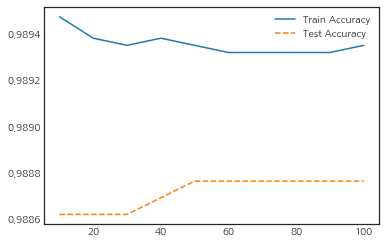

In [133]:
plt.plot(para_split,train_accuracy,linestyle='-',label = 'Train Accuracy')
plt.plot(para_split ,test_accuracy,linestyle = '--',label = 'Test Accuracy')
plt.legend()
#50

### 5-1. 기본

In [41]:
# 기본 모델 생성 및 정확도,정밀도,재현율 확인
gb= GradientBoostingClassifier(learning_rate=0.1,random_state=1234,n_estimators=100, max_depth=4,min_samples_leaf =25 , min_samples_split = 50)
gb.fit(df_train_x,df_train_y)
y_pred = gb.predict(df_test_x)
print('Accuracy: {0}'.format(accuracy_score(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,target_names = ['0','1']))

Accuracy: 0.9886175347597436
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13610
           1       0.97      0.43      0.59       271

    accuracy                           0.99     13881
   macro avg       0.98      0.71      0.79     13881
weighted avg       0.99      0.99      0.99     13881



### 5-2. Threshold 처리

In [42]:
#threshold 선택
gb= GradientBoostingClassifier(learning_rate=0.1,random_state=1234,n_estimators=100, max_depth=4,min_samples_leaf =25 , min_samples_split = 50)
gb.fit(df_train_x,df_train_y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=25, min_samples_split=50,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=1234, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


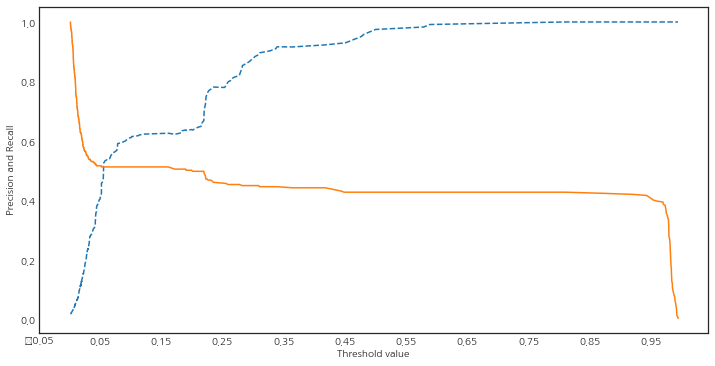

In [43]:
def precision_recall_curve_plot (y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    #x축을 theshold 값으로, y축을 각각 정밀도, 재현율로
    plt.figure(figsize = (12,6))
    threshold_boundary = thresholds.shape[0] #147?
    plt.plot(thresholds, precisions[0:threshold_boundary],linestyle='--',label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label = 'recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall')
    plt.show()

    
precision_recall_curve_plot(df_test_y, gb.predict_proba(df_test_x)[:,1])

In [44]:
#threshold 0.35 + 모델 생성 및 정확도,정밀도,재현율 확인
gb= GradientBoostingClassifier(learning_rate=0.1,random_state=1234,n_estimators=40, max_depth=5,min_samples_leaf =5 , min_samples_split = 14)
gb.fit(df_train_x,df_train_y)

pred_proba = gb.predict_proba(df_test_x)
pred_proba_1 = pred_proba[:,1].reshape(-1,1) 

binarizer = Binarizer(threshold=0.55).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

print('Accuracy: {0}'.format(accuracy_score(df_test_y,custom_predict)))
print(classification_report(df_test_y,custom_predict,target_names = ['0','1']))

Accuracy: 0.9886895756789856
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13610
           1       0.98      0.43      0.60       271

    accuracy                           0.99     13881
   macro avg       0.99      0.71      0.80     13881
weighted avg       0.99      0.99      0.99     13881



In [86]:
df_train_x.columns

Index(['계약기간', '월랜탈비용', '신용등급', '연령대', '남여구분_남자', '남여구분_여자', '판매유형_렌탈',
       '판매유형_멤버십', '계약유형_교체렌탈', '계약유형_멤버십A', '계약유형_멤버십B', '계약유형_멤버십S',
       '계약유형_멥버십C', '계약유형_일반', '계약유형_통합 패키지', '계약유형_프로모션', '유통경로_기기구매',
       '유통경로_기타', '유통경로_렌탈재계약', '유통경로_렌탈총판', '유통경로_방문판매', '유통경로_온라인',
       '유통경로_전자랜드', '유통경로_하이마트', '유통경로_홈쇼핑', '납부유형_CMS', '납부유형_가상계좌',
       '납부유형_무통장', '납부유형_카드이체'],
      dtype='object')

### 5-3. SMOTE 샘플링

In [45]:
#smote + 모델 생성 및 정확도,정밀도,재현율 확인

gb= GradientBoostingClassifier(learning_rate=0.1,random_state=1234,n_estimators=100, max_depth=4,min_samples_leaf =25 , min_samples_split = 50)
gb.fit(x_resampled,y_resampled)
y_pred = gb.predict(df_test_x)
print('Accuracy: {0}'.format(accuracy_score(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,target_names = ['0','1']))

Accuracy: 0.9726964916072329
              precision    recall  f1-score   support

           0       0.99      0.98      0.99     13610
           1       0.36      0.53      0.43       271

    accuracy                           0.97     13881
   macro avg       0.68      0.76      0.71     13881
weighted avg       0.98      0.97      0.98     13881



### 5-4. SMOTE 샘플링 +thr

In [46]:
gb= GradientBoostingClassifier(learning_rate=0.1,random_state=1234,n_estimators=100, max_depth=4,min_samples_leaf =25 , min_samples_split = 50)
gb.fit(x_resampled,y_resampled)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=25, min_samples_split=50,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=1234, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


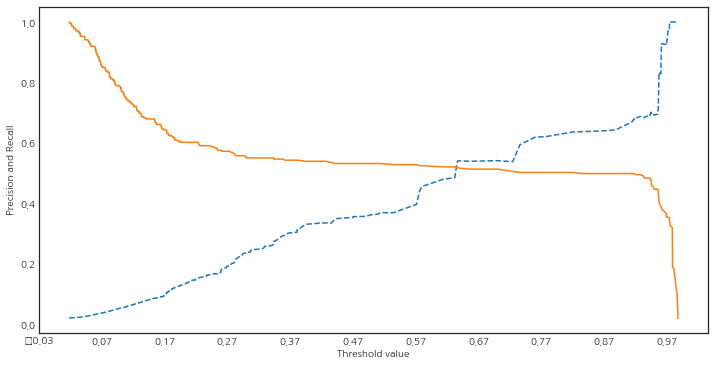

In [47]:
def precision_recall_curve_plot (y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    #x축을 theshold 값으로, y축을 각각 정밀도, 재현율로
    plt.figure(figsize = (12,6))
    threshold_boundary = thresholds.shape[0] #147?
    plt.plot(thresholds, precisions[0:threshold_boundary],linestyle='--',label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label = 'recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall')
    plt.show()

    
precision_recall_curve_plot(df_test_y, gb.predict_proba(df_test_x)[:,1])

In [48]:
#smote + thr(0.9) 모델 생성 및 정확도,정밀도,재현율 확인
gb= GradientBoostingClassifier(learning_rate=0.1,random_state=1234,n_estimators=100, max_depth=4,min_samples_leaf =25 , min_samples_split = 50)
gb.fit(x_resampled,y_resampled)
pred_proba = gb.predict_proba(df_test_x)
pred_proba_1 = pred_proba[:,1].reshape(-1,1) 

binarizer = Binarizer(threshold=0.9).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

print('Accuracy: {0}'.format(accuracy_score(df_test_y,custom_predict)))
print(classification_report(df_test_y,custom_predict,target_names = ['0','1']))

Accuracy: 0.9853756933938477
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13610
           1       0.67      0.50      0.57       271

    accuracy                           0.99     13881
   macro avg       0.83      0.75      0.78     13881
weighted avg       0.98      0.99      0.98     13881



### 5-5. Under 샘플링

In [81]:
# from imblearn.under_sampling import *
# x_samp, y_samp = CondensedNearestNeighbour(random_state=0).fit_sample(df_train_x,df_train_y)

In [ ]:
# gb= GradientBoostingClassifier(learning_rate=0.1,random_state=1234,n_estimators=100, max_depth=4,min_samples_leaf =25 , min_samples_split = 50)
# gb.fit(x_samp,y_samp)
# pred_proba = gb.predict_proba(df_test_x)
# pred_proba_1 = pred_proba[:,1].reshape(-1,1) 

# binarizer = Binarizer(threshold=0.25).fit(pred_proba_1)
# custom_predict = binarizer.transform(pred_proba_1)

# print('Accuracy: {0}'.format(accuracy_score(df_test_y,custom_predict)))
# print(classification_report(df_test_y,custom_predict,target_names = ['0','1']))

# 6. LGB -기본, 클래스 가중치, threshold, SMOTE샘플링

### 6-1. 기본

In [150]:
df_train_y

35502    0
7418     0
27994    0
39293    0
12528    0
7209     0
32306    0
25547    0
15383    0
20699    0
36694    0
25084    0
28806    0
12390    0
35242    1
9915     0
22451    0
27879    0
2206     0
22143    0
10442    0
24344    0
23619    0
29478    0
43187    0
36551    0
23783    0
18495    0
15643    0
44246    0
809      0
45989    0
41097    0
33594    0
37861    0
6896     0
29716    0
30596    0
15537    0
29494    0
12079    0
22087    0
21239    0
15876    0
25676    0
33197    0
12196    0
33779    0
42772    0
12720    0
        ..
25558    0
31700    0
27946    0
10041    0
17038    0
5994     0
2805     0
29843    0
34233    0
1503     0
13216    0
19991    0
21157    0
38332    0
30072    0
44991    0
3640     0
40332    0
35291    0
2755     0
41223    0
15724    0
14560    0
6852     0
32996    0
26727    0
25880    0
4223     0
14031    0
18912    0
12907    0
21751    0
13426    0
15686    0
41357    0
18587    0
34708    0
72       0
7523     0
11911    0

In [106]:
df_train_x = df_train_x.as_matrix()

/home/pirl/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [50]:
# 기본 모델 생성 및 정확도,정밀도,재현율 확인
lgb= LGBMClassifier(n_estimators=400)
lgb.fit(df_train_x,df_train_y)
y_pred = lgb.predict(df_test_x)
print('Accuracy: {0}'.format(accuracy_score(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,target_names = ['0','1']))

Accuracy: 0.9873928391326273
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13610
           1       0.84      0.44      0.57       271

    accuracy                           0.99     13881
   macro avg       0.92      0.72      0.78     13881
weighted avg       0.99      0.99      0.99     13881



### 6-2. 클래스 가중치

In [51]:
# 클래스가중치+ 모델 생성 및 정확도,정밀도,재현율 확인
lgb= LGBMClassifier(class_weight ={0:0.2,1:0.8}, random_state=1234,n_estimators=400)
lgb.fit(df_train_x,df_train_y)
y_pred = lgb.predict(df_test_x)
print('Accuracy: {0}'.format(accuracy_score(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,target_names = ['0','1']))

Accuracy: 0.983286506735826
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13610
           1       0.59      0.49      0.53       271

    accuracy                           0.98     13881
   macro avg       0.79      0.74      0.76     13881
weighted avg       0.98      0.98      0.98     13881



### 6-3. threshold 처리

In [52]:
# threshold+ 모델 생성 및 정확도,정밀도,재현율 확인
lgb= LGBMClassifier(random_state=1234,n_estimators=400)
lgb.fit(df_train_x,df_train_y)
y_pred = lgb.predict(df_test_x)
print('Accuracy: {0}'.format(accuracy_score(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,target_names = ['0','1']))

Accuracy: 0.9873928391326273
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13610
           1       0.84      0.44      0.57       271

    accuracy                           0.99     13881
   macro avg       0.92      0.72      0.78     13881
weighted avg       0.99      0.99      0.99     13881



/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


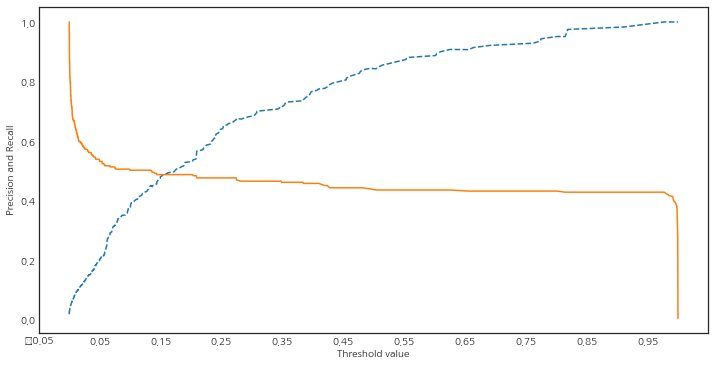

In [53]:
def precision_recall_curve_plot (y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    #x축을 theshold 값으로, y축을 각각 정밀도, 재현율로
    plt.figure(figsize = (12,6))
    threshold_boundary = thresholds.shape[0] 
    plt.plot(thresholds, precisions[0:threshold_boundary],linestyle='--',label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label = 'recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall')
    plt.show()

    
precision_recall_curve_plot(df_test_y, lgb.predict_proba(df_test_x)[:,1])


In [54]:
#threshold 0.65+ 모델 생성 및 정확도,정밀도,재현율 확인
lgb= LGBMClassifier(random_state=1234,n_estimators=400)
lgb.fit(df_train_x,df_train_y)

pred_proba = lgb.predict_proba(df_test_x)
pred_proba_1 = pred_proba[:,1].reshape(-1,1) 

binarizer = Binarizer(threshold=0.85).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

print('Accuracy: {0}'.format(accuracy_score(df_test_y,custom_predict)))
print(classification_report(df_test_y,custom_predict,target_names = ['0','1']))

Accuracy: 0.9886895756789856
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13610
           1       0.98      0.43      0.60       271

    accuracy                           0.99     13881
   macro avg       0.99      0.71      0.80     13881
weighted avg       0.99      0.99      0.99     13881



### 6-4. SMOTE 샘플링

In [106]:
# smote+ 모델 생성 및 정확도,정밀도,재현율 확인
lgb= LGBMClassifier(random_state=1234,n_estimators=400)
lgb.fit(x_resampled,y_resampled)
y_pred = lgb.predict(df_test_x)
print('Accuracy: {0}'.format(accuracy_score(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,target_names = ['0','1']))

Accuracy: 0.9397017505943376
              precision    recall  f1-score   support

           0       0.99      0.95      0.97     13610
           1       0.18      0.57      0.27       271

    accuracy                           0.94     13881
   macro avg       0.58      0.76      0.62     13881
weighted avg       0.98      0.94      0.95     13881



### 6-5. SMOTE 샘플링+ thr

In [107]:
lgb= LGBMClassifier(random_state=1234,n_estimators=400)
lgb.fit(x_resampled,y_resampled)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=400, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1234, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


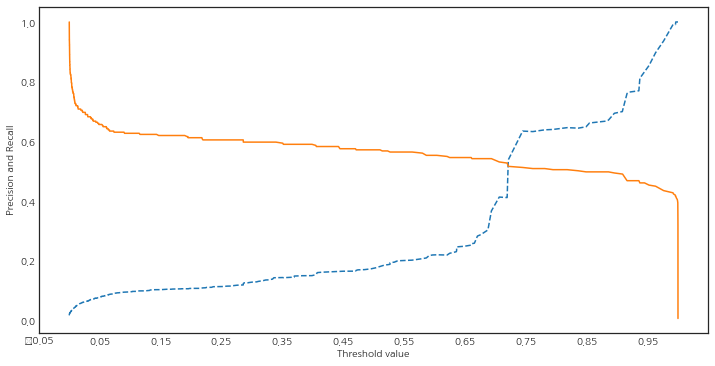

In [108]:
def precision_recall_curve_plot (y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    #x축을 theshold 값으로, y축을 각각 정밀도, 재현율로
    plt.figure(figsize = (12,6))
    threshold_boundary = thresholds.shape[0] 
    plt.plot(thresholds, precisions[0:threshold_boundary],linestyle='--',label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label = 'recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall')
    plt.show()

    
precision_recall_curve_plot(df_test_y, lgb.predict_proba(df_test_x)[:,1])

In [113]:
#smote+ threshold 0.9 + 모델 생성 및 정확도,정밀도,재현율 확인
lgb= LGBMClassifier(random_state=1234,n_estimators=400)
lgb.fit(x_resampled,y_resampled)

pred_proba = lgb.predict_proba(df_test_x)
pred_proba_1 = pred_proba[:,1].reshape(-1,1) 

binarizer = Binarizer(threshold=0.9).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

print('Accuracy: {0}'.format(accuracy_score(df_test_y,custom_predict)))
print(classification_report(df_test_y,custom_predict,target_names = ['0','1']))

Accuracy: 0.9859520207477848
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13610
           1       0.70      0.49      0.58       271

    accuracy                           0.99     13881
   macro avg       0.84      0.74      0.78     13881
weighted avg       0.98      0.99      0.98     13881



# 7.XGB - 기본, 클래스 가중치, threshold, SMOTE샘플링 

### 7-1. 기본

In [107]:
# 기본 모델 생성 및 정확도,정밀도,재현율 확인
name = df_valid_x.columns
df_x = pd.DataFrame(df_train_x.reshape(len(df_train_x), len(name)), columns = name) 
xgb = XGBClassifier(n_estimators=400, learning_rate = 0.1, max_depth = 5)

xgb.fit(df_x,df_train_y)
y_pred = xgb.predict(df_valid_x)
print('Accuracy: {0}'.format(accuracy_score(df_valid_y,y_pred)))
print(classification_report(df_valid_y,y_pred,target_names = ['0','1']))

Accuracy: 0.9887813915191437
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9527
           1       0.84      0.52      0.64       189

    accuracy                           0.99      9716
   macro avg       0.92      0.76      0.82      9716
weighted avg       0.99      0.99      0.99      9716



### 7-2. threshold 처리

In [108]:
# thr+ 모델 생성 및 정확도,정밀도,재현율 확인
name = df_valid_x.columns
df_x = pd.DataFrame(df_train_x.reshape(len(df_train_x), len(name)), columns = name) 
xgb = XGBClassifier(n_estimators=400, learning_rate = 0.1, max_depth = 5)

xgb.fit(df_x,df_train_y)
y_pred = xgb.predict(df_valid_x)
print('Accuracy: {0}'.format(accuracy_score(df_valid_y,y_pred)))
print(classification_report(df_valid_y,y_pred,target_names = ['0','1']))

Accuracy: 0.9887813915191437
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      9527
           1       0.84      0.52      0.64       189

    accuracy                           0.99      9716
   macro avg       0.92      0.76      0.82      9716
weighted avg       0.99      0.99      0.99      9716



/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


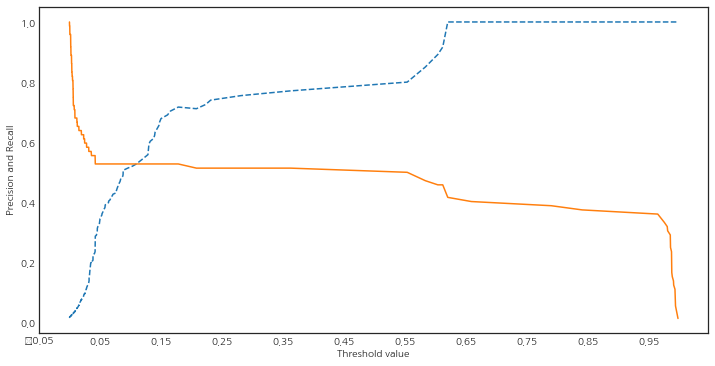

In [109]:
def precision_recall_curve_plot (y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    #x축을 theshold 값으로, y축을 각각 정밀도, 재현율로
    plt.figure(figsize = (12,6))
    threshold_boundary = thresholds.shape[0] 
    plt.plot(thresholds, precisions[0:threshold_boundary],linestyle='--',label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label = 'recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall')
    plt.show()

    
precision_recall_curve_plot(df_test_y, xgb.predict_proba(df_test_x)[:,1])

In [110]:
#threshold 0.4 + 모델 생성 및 정확도,정밀도,재현율 확인
name = df_test_x.columns
df_x = pd.DataFrame(df_train_x.reshape(len(df_train_x), len(name)), columns = name) 
xgb = XGBClassifier(n_estimators=400, learning_rate = 0.1, max_depth = 5)

xgb.fit(df_x,df_train_y)


pred_proba = xgb.predict_proba(df_test_x)
pred_proba_1 = pred_proba[:,1].reshape(-1,1) 

binarizer = Binarizer(threshold=0.65).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

print('Accuracy: {0}'.format(accuracy_score(df_test_y,custom_predict)))
print(classification_report(df_test_y,custom_predict,target_names = ['0','1']))

Accuracy: 0.9896758703481393
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4093
           1       1.00      0.40      0.57        72

    accuracy                           0.99      4165
   macro avg       0.99      0.70      0.78      4165
weighted avg       0.99      0.99      0.99      4165



### 7-3. SMOTE

In [121]:
# smote+ 모델 생성 및 정확도,정밀도,재현율 확인
name = df_test_x.columns
df_x = pd.DataFrame(x_resampled.reshape(len(x_resampled), len(name)), columns = name) 
xgb = XGBClassifier(n_estimators=400, learning_rate = 0.1, max_depth = 5)

xgb.fit(df_x,y_resampled)
y_pred = xgb.predict(df_test_x)
print('Accuracy: {0}'.format(accuracy_score(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,target_names = ['0','1']))

Accuracy: 0.9489229882573301
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     13610
           1       0.20      0.56      0.30       271

    accuracy                           0.95     13881
   macro avg       0.60      0.76      0.64     13881
weighted avg       0.98      0.95      0.96     13881



### 7-4. SMOTE +thr

In [122]:
name = df_test_x.columns
df_x = pd.DataFrame(x_resampled.reshape(len(x_resampled), len(name)), columns = name) 
xgb = XGBClassifier(n_estimators=400, learning_rate = 0.1, max_depth = 5)

xgb.fit(df_x,y_resampled)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=400, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


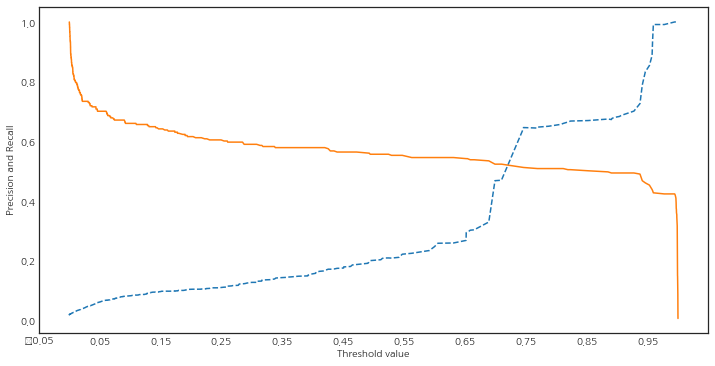

In [123]:
def precision_recall_curve_plot (y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    #x축을 theshold 값으로, y축을 각각 정밀도, 재현율로
    plt.figure(figsize = (12,6))
    threshold_boundary = thresholds.shape[0] 
    plt.plot(thresholds, precisions[0:threshold_boundary],linestyle='--',label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label = 'recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall')
    plt.show()

    
precision_recall_curve_plot(df_test_y, xgb.predict_proba(df_test_x)[:,1])

In [124]:
#threshold 0.77 + 모델 생성 및 정확도,정밀도,재현율 확인
name = df_test_x.columns
df_x = pd.DataFrame(x_resampled.reshape(len(x_resampled), len(name)), columns = name) 
xgb = XGBClassifier(n_estimators=400, learning_rate = 0.1, max_depth = 5)

xgb.fit(df_x,y_resampled)


pred_proba = xgb.predict_proba(df_test_x)
pred_proba_1 = pred_proba[:,1].reshape(-1,1) 

binarizer = Binarizer(threshold=0.9).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

print('Accuracy: {0}'.format(accuracy_score(df_test_y,custom_predict)))
print(classification_report(df_test_y,custom_predict,target_names = ['0','1']))

Accuracy: 0.9856638570708163
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     13610
           1       0.68      0.49      0.57       271

    accuracy                           0.99     13881
   macro avg       0.84      0.74      0.78     13881
weighted avg       0.98      0.99      0.98     13881



# 8. Catboost - 기본, cw, thr, smote

### 8-1. Catboost 기본

In [25]:
# split dataset
df_train_x, df_valid_x,df_train_y, df_valid_y = train_test_split(df_c_x, df_c_y, train_size=0.5, test_size = 0.5, random_state=1234)
df_valid_x, df_test_x, df_valid_y, df_test_y = train_test_split(df_valid_x, df_valid_y, train_size = 0.6, test_size = 0.4, random_state = 1234)

In [27]:
#Catboost_b,validT
start = time.time()
cat_features = np.where(df_train_x.dtypes.astype("str").isin(["category","object"]))[0]
CatBoost = CatBoostClassifier(random_seed = 1234)
CatBoost.fit(X = df_train_x, y = df_train_y, cat_features = cat_features, eval_set=(df_valid_x, df_valid_y) )df_train_x, df_valid_x,df_train_y, df_valid_y = train_test_split(df_c_x, df_c_y, train_size=0.5, test_size = 0.5, random_state=1234)
df_valid_x, df_test_x, df_valid_y, df_test_y = train_test_split(df_valid_x, df_valid_y, train_size = 0.6, test_size = 0.4, random_state = 1234)
CatBoost_Runtime = time.time() - start


y_pred = CatBoost.predict(df_test_x)
print('Accuracy: {0}'.format(accuracy_score(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,target_names = ['0','1']))

Learning rate set to 0.108517
0:	learn: 0.4797349	test: 0.4785485	best: 0.4785485 (0)	total: 32.9ms	remaining: 32.9s
1:	learn: 0.3407167	test: 0.3390683	best: 0.3390683 (1)	total: 51.1ms	remaining: 25.5s
2:	learn: 0.2542845	test: 0.2522463	best: 0.2522463 (2)	total: 68.7ms	remaining: 22.8s
3:	learn: 0.1923914	test: 0.1897617	best: 0.1897617 (3)	total: 78.5ms	remaining: 19.5s
4:	learn: 0.1520840	test: 0.1490776	best: 0.1490776 (4)	total: 85.9ms	remaining: 17.1s
5:	learn: 0.1242692	test: 0.1208234	best: 0.1208234 (5)	total: 93.4ms	remaining: 15.5s
6:	learn: 0.1057910	test: 0.1020401	best: 0.1020401 (6)	total: 101ms	remaining: 14.3s
7:	learn: 0.0929692	test: 0.0890223	best: 0.0890223 (7)	total: 108ms	remaining: 13.4s
8:	learn: 0.0839151	test: 0.0797336	best: 0.0797336 (8)	total: 115ms	remaining: 12.7s
9:	learn: 0.0780321	test: 0.0737027	best: 0.0737027 (9)	total: 123ms	remaining: 12.1s
10:	learn: 0.0735547	test: 0.0691804	best: 0.0691804 (10)	total: 130ms	remaining: 11.7s
11:	learn: 0.069

## 8-2. Catboost 클래스 가중치

In [31]:
#Catboost_b,validT
start = time.time()
cat_features = np.where(df_train_x.dtypes.astype("str").isin(["category","object"]))[0]
CatBoost = CatBoostClassifier(class_weights = {0:0.2,1:0.8},random_seed = 1234)
CatBoost.fit(X = df_train_x, y = df_train_y, cat_features = cat_features) eval_set=(df_valid_x, df_valid_y) 
CatBoost_Runtime = time.time() - start


y_pred = CatBoost.predict(df_test_x)
print('Accuracy: {0}'.format(accuracy_score(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,target_names = ['0','1']))

CatBoostError: catboost/private/libs/options/json_helper.h:153: Can't parse parameter "class_weights" with value: {"1":0.8,"0":0.2}

### 8-3. Catboost thr 처리

In [35]:
#Catboost_b,validT
start = time.time()
cat_features = np.where(df_train_x.dtypes.astype("str").isin(["category","object"]))[0]
CatBoost = CatBoostClassifier(random_seed = 1234)
CatBoost.fit(X = df_train_x, y = df_train_y, cat_features = cat_features, eval_set=(df_valid_x, df_valid_y) )
CatBoost_Runtime = time.time() - start


Learning rate set to 0.108517
0:	learn: 0.4797349	test: 0.4785485	best: 0.4785485 (0)	total: 29.3ms	remaining: 29.2s
1:	learn: 0.3407167	test: 0.3390683	best: 0.3390683 (1)	total: 46.2ms	remaining: 23s
2:	learn: 0.2542845	test: 0.2522463	best: 0.2522463 (2)	total: 61.4ms	remaining: 20.4s
3:	learn: 0.1923914	test: 0.1897617	best: 0.1897617 (3)	total: 73.1ms	remaining: 18.2s
4:	learn: 0.1520840	test: 0.1490776	best: 0.1490776 (4)	total: 85.3ms	remaining: 17s
5:	learn: 0.1242692	test: 0.1208234	best: 0.1208234 (5)	total: 98.7ms	remaining: 16.3s
6:	learn: 0.1057910	test: 0.1020401	best: 0.1020401 (6)	total: 107ms	remaining: 15.1s
7:	learn: 0.0929692	test: 0.0890223	best: 0.0890223 (7)	total: 114ms	remaining: 14.1s
8:	learn: 0.0839151	test: 0.0797336	best: 0.0797336 (8)	total: 121ms	remaining: 13.3s
9:	learn: 0.0780321	test: 0.0737027	best: 0.0737027 (9)	total: 128ms	remaining: 12.7s
10:	learn: 0.0735547	test: 0.0691804	best: 0.0691804 (10)	total: 135ms	remaining: 12.1s
11:	learn: 0.0699395

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


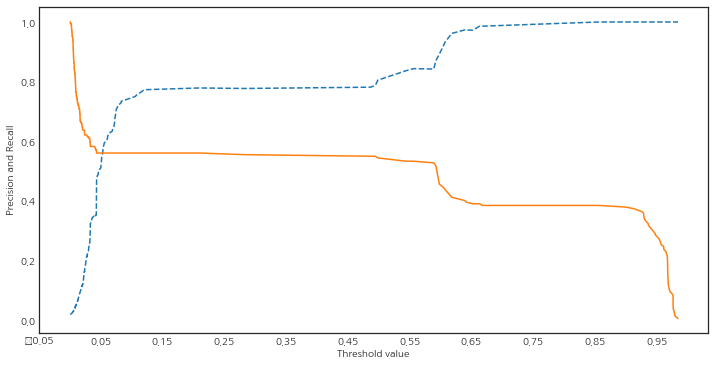

In [36]:
def precision_recall_curve_plot (y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    #x축을 theshold 값으로, y축을 각각 정밀도, 재현율로
    plt.figure(figsize = (12,6))
    threshold_boundary = thresholds.shape[0] 
    plt.plot(thresholds, precisions[0:threshold_boundary],linestyle='--',label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label = 'recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall')
    plt.show()

    
precision_recall_curve_plot(df_test_y, CatBoost.predict_proba(df_test_x)[:,1])

In [40]:
#threshold 0.63 + 모델 생성 및 정확도,정밀도,재현율 확인
start = time.time()
cat_features = np.where(df_train_x.dtypes.astype("str").isin(["category","object"]))[0]
CatBoost = CatBoostClassifier(random_seed = 1234)
CatBoost.fit(X = df_train_x, y = df_train_y, cat_features = cat_features, eval_set=(df_valid_x, df_valid_y) )
CatBoost_Runtime = time.time() - start


pred_proba = CatBoost.predict_proba(df_test_x)
pred_proba_1 = pred_proba[:,1].reshape(-1,1) 

binarizer = Binarizer(threshold=0.63).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

print('Accuracy: {0}'.format(accuracy_score(df_test_y,custom_predict)))
print(classification_report(df_test_y,custom_predict,target_names = ['0','1']))

Learning rate set to 0.108517
0:	learn: 0.4797349	test: 0.4785485	best: 0.4785485 (0)	total: 19.4ms	remaining: 19.4s
1:	learn: 0.3407167	test: 0.3390683	best: 0.3390683 (1)	total: 42.5ms	remaining: 21.2s
2:	learn: 0.2542845	test: 0.2522463	best: 0.2522463 (2)	total: 50.2ms	remaining: 16.7s
3:	learn: 0.1923914	test: 0.1897617	best: 0.1897617 (3)	total: 64.8ms	remaining: 16.1s
4:	learn: 0.1520840	test: 0.1490776	best: 0.1490776 (4)	total: 71.9ms	remaining: 14.3s
5:	learn: 0.1242692	test: 0.1208234	best: 0.1208234 (5)	total: 79.3ms	remaining: 13.1s
6:	learn: 0.1057910	test: 0.1020401	best: 0.1020401 (6)	total: 86.3ms	remaining: 12.2s
7:	learn: 0.0929692	test: 0.0890223	best: 0.0890223 (7)	total: 93.4ms	remaining: 11.6s
8:	learn: 0.0839151	test: 0.0797336	best: 0.0797336 (8)	total: 101ms	remaining: 11.1s
9:	learn: 0.0780321	test: 0.0737027	best: 0.0737027 (9)	total: 107ms	remaining: 10.6s
10:	learn: 0.0735547	test: 0.0691804	best: 0.0691804 (10)	total: 115ms	remaining: 10.3s
11:	learn: 0.0

### 8-4. Catboost+smote

In [59]:
#SMOTE
smote = SMOTE()
x_resampled, y_resampled = smote.fit_sample(df_train_x,df_train_y)

In [60]:
x_resampled = pd.DataFrame(data = x_resampled,columns=df_train_x.columns)

In [61]:
x_resampled

,계약기간,월랜탈비용,연체건수,신용등급,남여구분_남자,남여구분_여자,판매유형_렌탈,판매유형_멤버십,계약유형_교체렌탈,계약유형_멤버십A,계약유형_멤버십B,계약유형_멤버십S,계약유형_멥버십C,계약유형_일반,계약유형_통합 패키지,...,납부유형_카드이체,제품군_DES-1,제품군_DES-2,제품군_DES-3A,제품군_DES-R4,제품군_ERA,제품군_MMC,연령대_20,연령대_30,연령대_40,연령대_50,연령대_60,연령대_70,연령대_80,연령대_90
0,60,96900,0,4,0,1,1,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,60,105900,0,1,0,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,60,96900,0,1,1,0,1,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,36,56979,0,1,0,1,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,60,96900,0,2,0,1,1,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
5,60,96900,0,1,0,1,1,0,0,0,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0
6,60,81900,0,2,1,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
7,60,96900,0,4,1,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
8,60,90900,0,5,0,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
9,36,58743,0,1,0,1,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [63]:
x_r = x_resampled

start = time.time()
cat_features = np.where(x_r.dtypes.astype("str").isin(["category","object"]))[0]
CatBoost = CatBoostClassifier(random_seed = 1234)
CatBoost.fit(X = x_resampled, y = y_resampled, cat_features = cat_features, eval_set=(df_valid_x, df_valid_y) )
CatBoost_Runtime = time.time() - start

y_pred = CatBoost.predict(df_test_x)
print('Accuracy: {0}'.format(accuracy_score(df_test_y,y_pred)))
print(classification_report(df_test_y,y_pred,target_names = ['0','1']))

Learning rate set to 0.116459
0:	learn: 0.6930752	test: 0.6953777	best: 0.6953777 (0)	total: 16.5ms	remaining: 16.4s
1:	learn: 0.6930495	test: 0.6951587	best: 0.6951587 (1)	total: 27.5ms	remaining: 13.7s
2:	learn: 0.6930223	test: 0.6948746	best: 0.6948746 (2)	total: 36.1ms	remaining: 12s
3:	learn: 0.6929848	test: 0.6987902	best: 0.6948746 (2)	total: 45.2ms	remaining: 11.2s
4:	learn: 0.6929135	test: 0.6992030	best: 0.6948746 (2)	total: 56ms	remaining: 11.2s
5:	learn: 0.6928718	test: 0.6988117	best: 0.6948746 (2)	total: 65.4ms	remaining: 10.8s
6:	learn: 0.6928403	test: 0.6986405	best: 0.6948746 (2)	total: 74.8ms	remaining: 10.6s
7:	learn: 0.6928170	test: 0.7020591	best: 0.6948746 (2)	total: 84.4ms	remaining: 10.5s
8:	learn: 0.6927918	test: 0.7044316	best: 0.6948746 (2)	total: 94.6ms	remaining: 10.4s
9:	learn: 0.6927350	test: 0.7046723	best: 0.6948746 (2)	total: 105ms	remaining: 10.4s
10:	learn: 0.6926981	test: 0.7068932	best: 0.6948746 (2)	total: 115ms	remaining: 10.4s
11:	learn: 0.69266

### 8-5. Catboost+smote+thr (XXX)

In [64]:
x_r = x_resampled

start = time.time()
cat_features = np.where(x_r.dtypes.astype("str").isin(["category","object"]))[0]
CatBoost = CatBoostClassifier(random_seed = 1234)
CatBoost.fit(X = x_resampled, y = y_resampled, cat_features = cat_features, eval_set=(df_valid_x, df_valid_y) )
CatBoost_Runtime = time.time() - start

Learning rate set to 0.116459
0:	learn: 0.6930752	test: 0.6953777	best: 0.6953777 (0)	total: 23.6ms	remaining: 23.6s
1:	learn: 0.6930495	test: 0.6951587	best: 0.6951587 (1)	total: 35.3ms	remaining: 17.6s
2:	learn: 0.6930223	test: 0.6948746	best: 0.6948746 (2)	total: 44.5ms	remaining: 14.8s
3:	learn: 0.6929848	test: 0.6987902	best: 0.6948746 (2)	total: 53.8ms	remaining: 13.4s
4:	learn: 0.6929135	test: 0.6992030	best: 0.6948746 (2)	total: 65.1ms	remaining: 13s
5:	learn: 0.6928718	test: 0.6988117	best: 0.6948746 (2)	total: 74.7ms	remaining: 12.4s
6:	learn: 0.6928403	test: 0.6986405	best: 0.6948746 (2)	total: 84.1ms	remaining: 11.9s
7:	learn: 0.6928170	test: 0.7020591	best: 0.6948746 (2)	total: 93.9ms	remaining: 11.6s
8:	learn: 0.6927918	test: 0.7044316	best: 0.6948746 (2)	total: 104ms	remaining: 11.5s
9:	learn: 0.6927350	test: 0.7046723	best: 0.6948746 (2)	total: 115ms	remaining: 11.4s
10:	learn: 0.6926981	test: 0.7068932	best: 0.6948746 (2)	total: 125ms	remaining: 11.3s
11:	learn: 0.6926

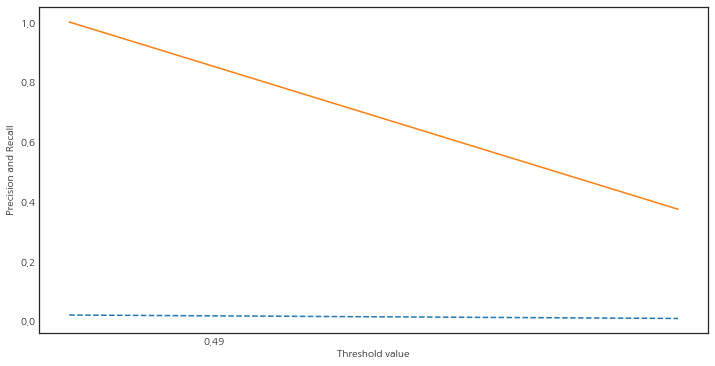

In [65]:
def precision_recall_curve_plot (y_test, pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    #x축을 theshold 값으로, y축을 각각 정밀도, 재현율로
    plt.figure(figsize = (12,6))
    threshold_boundary = thresholds.shape[0] 
    plt.plot(thresholds, precisions[0:threshold_boundary],linestyle='--',label = 'precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label = 'recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold value')
    plt.ylabel('Precision and Recall')
    plt.show()

    
precision_recall_curve_plot(df_test_y, CatBoost.predict_proba(df_test_x)[:,1])

# 9.NNC

In [126]:
#nnc 

nnc = MLPClassifier(random_state = 1234)
nnc.fit(df_train_x,df_train_y )
y_pred = nnc.predict(df_valid_x)

print('Accuracy: {0}'.format(accuracy_score(df_valid_y,y_pred)))
print(classification_report(df_valid_y,y_pred,target_names = ['0','1']))

Accuracy: 0.9800329353643474
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9527
           1       0.49      0.53      0.51       189

    accuracy                           0.98      9716
   macro avg       0.74      0.76      0.75      9716
weighted avg       0.98      0.98      0.98      9716



In [129]:
#nnc gridSearch
estimator =  MLPClassifier(random_state=1234)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive']}


grid_nnc = GridSearchCV(estimator,parameter_space,scoring='accuracy',n_jobs=-1)
grid_nnc.fit(df_train_x,df_train_y)

print('best estimator model:\n{}'.format(grid_nnc.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_nnc.best_params_))
print('\nbest score:\n{}'.format(grid_nnc.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model:
MLPClassifier(activation='tanh', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(50, 50, 50), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1234, shuffle=True, solver='sgd', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

best parameter:
{'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}

best score:
0.98


# 10. Ada

In [127]:
#girdSearchCV parameter
AdaBoost = AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state = 1234)
AdaBoost.fit(df_train_x,df_train_y )
y_pred = AdaBoost.predict(df_valid_x)

print('Accuracy: {0}'.format(accuracy_score(df_valid_y,y_pred)))
print(classification_report(df_valid_y,y_pred,target_names = ['0','1']))

Accuracy: 0.9805475504322767
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      9527
           1       0.00      0.00      0.00       189

    accuracy                           0.98      9716
   macro avg       0.49      0.50      0.50      9716
weighted avg       0.96      0.98      0.97      9716



/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [125]:
n_estimators = [n_esti*10 for n_esti in range(1,11)]
learning_rate = [n_learn**10 for n_learn in range(1,3)]


estimator =  AdaBoostClassifier(random_state=1234)

param_grid = {'n_estimators':n_estimators,'learning_rate':learning_rate}

grid_ada = GridSearchCV(estimator,param_grid,scoring='accuracy',n_jobs=-1)
grid_ada.fit(df_train_x,df_train_y)

print('best estimator model:\n{}'.format(grid_ada.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_ada.best_params_))
print('\nbest score:\n{}'.format(grid_ada.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model:
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=100, random_state=1234)

best parameter:
{'learning_rate': 1, 'n_estimators': 100}

best score:
0.981


# 11. 분류 모델 평가 (DT, RF, GB)

In [222]:
model = ['DT(b)','DT(cw)','DT(thr)','DT(sm)','RF(b)','RF(cw)','RF(thr)','RF(sm)','GB(b)','GB(thr)','GB(sm)']
train_accuracy = []; test_accuracy=[]

model_f1_score = []
model_auc = []

In [223]:
#dt-basic

dt_b = DecisionTreeClassifier(random_state=1234, max_depth=3,min_samples_leaf =14 , min_samples_split = 28)
dt_b.fit(df_train_x,df_train_y)

train_accuracy.append(dt_b.score(df_train_x,df_train_y)) 
test_accuracy.append(dt_b.score(df_test_x,df_test_y)) 

y_pred = dt_b.predict(df_test_x)

fpr,tpr,thresholds = roc_curve(df_test_y, y_pred)
roc_auc  = auc(fpr,tpr)

model_auc.append(roc_auc)
model_f1_score.append(f1_score(df_test_y,y_pred))

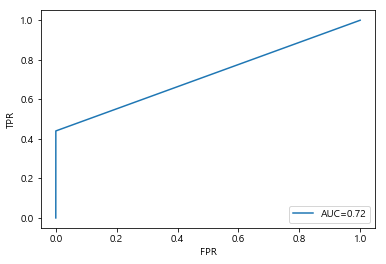

In [224]:
#dt-basic / roc curve 그리기 ,label에 auc 표시 (소수점 2자리)
plt.plot ( fpr,tpr,label ='AUC=%0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR') ; plt.xlabel('FPR')
plt.show()

In [225]:
#dt-class weight 

dt_cw = DecisionTreeClassifier(class_weight ={0:0.2,1:0.8},random_state=1234, max_depth=3,min_samples_leaf =14 , min_samples_split = 28)
dt_cw.fit(df_train_x,df_train_y)

train_accuracy.append(dt_cw.score(df_train_x,df_train_y)) 
test_accuracy.append(dt_cw.score(df_test_x,df_test_y)) 

y_pred = dt_cw.predict(df_test_x)

fpr,tpr,thresholds = roc_curve(df_test_y, y_pred)
roc_auc  = auc(fpr,tpr)

model_auc.append(roc_auc)
model_f1_score.append(f1_score(df_test_y,y_pred))

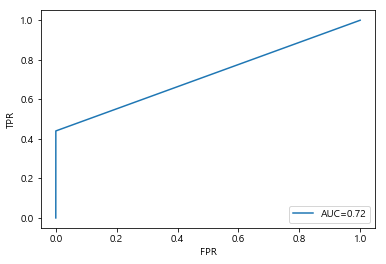

In [226]:
#dt-cw / roc curve 그리기 ,label에 auc 표시 (소수점 2자리)
plt.plot ( fpr,tpr,label ='AUC=%0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR') ; plt.xlabel('FPR')
plt.show()

In [227]:
#dt-threshold

dt_thr = DecisionTreeClassifier(random_state=1234, max_depth=3,min_samples_leaf =14 , min_samples_split = 28)
dt_thr.fit(df_train_x,df_train_y)

train_accuracy.append(dt_thr.score(df_train_x,df_train_y)) 
test_accuracy.append(dt_thr.score(df_test_x,df_test_y)) 


pred_proba = dt_thr.predict_proba(df_test_x)
pred_proba_1 = pred_proba[:,1].reshape(-1,1) 

binarizer = Binarizer(threshold=0.2).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

fpr,tpr,thresholds = roc_curve(df_test_y, custom_predict)
roc_auc  = auc(fpr,tpr)

model_auc.append(roc_auc)
model_f1_score.append(f1_score(df_test_y,custom_predict))

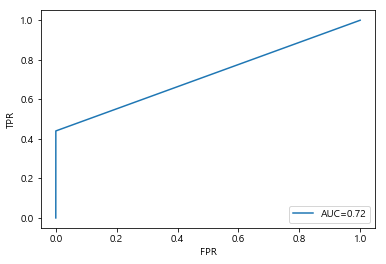

In [228]:
#dt-thr / roc curve 그리기 ,label에 auc 표시 (소수점 2자리)
plt.plot ( fpr,tpr,label ='AUC=%0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR') ; plt.xlabel('FPR')
plt.show()

In [229]:
#dt-smote

dt_sm = DecisionTreeClassifier(random_state=1234, max_depth=3,min_samples_leaf =14 , min_samples_split = 28)
dt_sm.fit(x_resampled,y_resampled)

train_accuracy.append(dt_sm.score(x_resampled,y_resampled)) 
test_accuracy.append(dt_sm.score(df_test_x,df_test_y)) 

y_pred = dt_sm.predict(df_test_x)

fpr,tpr,thresholds = roc_curve(df_test_y, y_pred)
roc_auc  = auc(fpr,tpr)

model_auc.append(roc_auc)
model_f1_score.append(f1_score(df_test_y,y_pred))

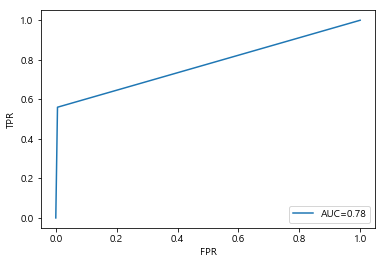

In [230]:
#dt_sm / roc curve 그리기 ,label에 auc 표시 (소수점 2자리)
plt.plot ( fpr,tpr,label ='AUC=%0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR') ; plt.xlabel('FPR')
plt.show()

In [231]:
#rf-basic
rf_b = RandomForestClassifier(random_state=1234,n_estimators=60, max_depth=5,min_samples_leaf =20 , min_samples_split = 40)
rf_b.fit(df_train_x,df_train_y)

train_accuracy.append(rf_b.score(df_train_x,df_train_y)) 
test_accuracy.append(rf_b.score(df_test_x,df_test_y)) 

y_pred = rf_b.predict(df_test_x)

fpr,tpr,thresholds = roc_curve(df_test_y, y_pred)
roc_auc  = auc(fpr,tpr)

model_auc.append(roc_auc)
model_f1_score.append(f1_score(df_test_y,y_pred))

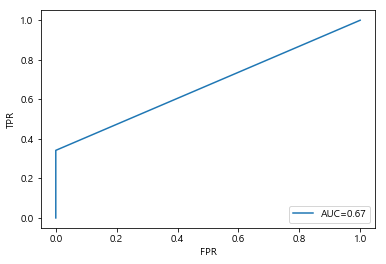

In [232]:
#rf_b/roc curve 그리기 ,label에 auc 표시 (소수점 2자리)
plt.plot ( fpr,tpr,label ='AUC=%0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR') ; plt.xlabel('FPR')
plt.show()

In [233]:
#rf-class weight 
rf_cw = RandomForestClassifier(class_weight ={0:0.2,1:0.8},random_state=1234,n_estimators=60, max_depth=5,min_samples_leaf =20 , min_samples_split = 40)
rf_cw.fit(df_train_x,df_train_y)

train_accuracy.append(rf_cw.score(df_train_x,df_train_y)) 
test_accuracy.append(rf_cw.score(df_test_x,df_test_y)) 

y_pred = rf_cw.predict(df_test_x)

fpr,tpr,thresholds = roc_curve(df_test_y, y_pred)
roc_auc  = auc(fpr,tpr)

model_auc.append(roc_auc)
model_f1_score.append(f1_score(df_test_y,y_pred))

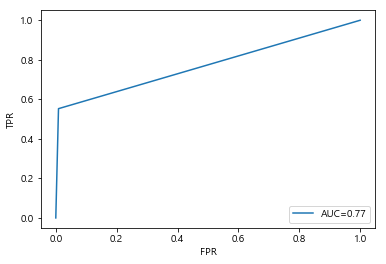

In [234]:
#rf_cw/roc curve 그리기 ,label에 auc 표시 (소수점 2자리)
plt.plot ( fpr,tpr,label ='AUC=%0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR') ; plt.xlabel('FPR')
plt.show()

In [235]:
#rf-threshold

rf_thr = RandomForestClassifier(random_state=1234,n_estimators=60, max_depth=5,min_samples_leaf =20 , min_samples_split = 40)
rf_thr.fit(df_train_x,df_train_y)

train_accuracy.append(rf_thr.score(df_train_x,df_train_y)) 
test_accuracy.append(rf_thr.score(df_test_x,df_test_y)) 

pred_proba = rf_thr.predict_proba(df_test_x)
pred_proba_1 = pred_proba[:,1].reshape(-1,1) 

binarizer = Binarizer(threshold=0.12).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

fpr,tpr,thresholds = roc_curve(df_test_y, custom_predict)
roc_auc  = auc(fpr,tpr)

model_auc.append(roc_auc)
model_f1_score.append(f1_score(df_test_y,custom_predict))

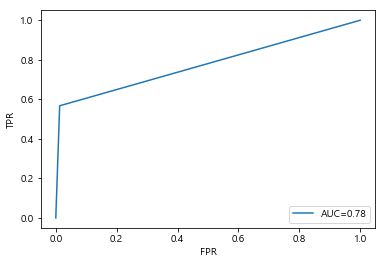

In [236]:
#rf_thr/roc curve 그리기 ,label에 auc 표시 (소수점 2자리)
plt.plot ( fpr,tpr,label ='AUC=%0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR') ; plt.xlabel('FPR')
plt.show()

In [237]:
#rf-smote
rf_sm = RandomForestClassifier(random_state=1234,n_estimators=60, max_depth=5,min_samples_leaf =20 , min_samples_split = 40)
rf_sm.fit(x_resampled ,y_resampled)

train_accuracy.append(rf_sm.score(x_resampled ,y_resampled)) 
test_accuracy.append(rf_sm.score(df_test_x,df_test_y)) 

y_pred = rf_sm.predict(df_test_x)

fpr,tpr,thresholds = roc_curve(df_test_y, y_pred)
roc_auc  = auc(fpr,tpr)

model_auc.append(roc_auc)
model_f1_score.append(f1_score(df_test_y,y_pred))

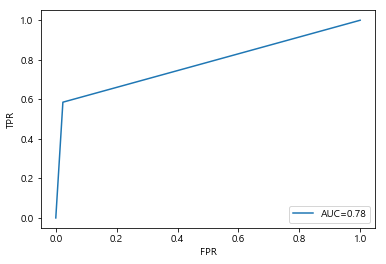

In [238]:
#rf_sm / roc curve 그리기 ,label에 auc 표시 (소수점 2자리)
plt.plot ( fpr,tpr,label ='AUC=%0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR') ; plt.xlabel('FPR')
plt.show()

In [239]:
#gb-basic

gb_b= GradientBoostingClassifier(learning_rate=0.15,random_state=1234,n_estimators=60, max_depth=5,min_samples_leaf =20 , min_samples_split = 40)
gb_b.fit(df_train_x,df_train_y)

train_accuracy.append(gb_b.score(df_train_x,df_train_y)) 
test_accuracy.append(gb_b.score(df_test_x,df_test_y)) 

y_pred = gb_b.predict(df_test_x)

fpr,tpr,thresholds = roc_curve(df_test_y, y_pred)
roc_auc  = auc(fpr,tpr)

model_auc.append(roc_auc)
model_f1_score.append(f1_score(df_test_y,y_pred))

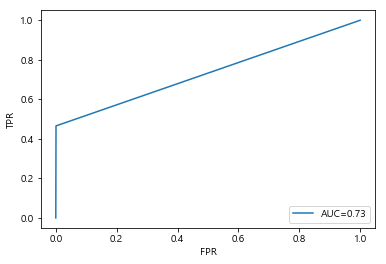

In [240]:
#gb_b/ roc curve 그리기 ,label에 auc 표시 (소수점 2자리)
plt.plot ( fpr,tpr,label ='AUC=%0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR') ; plt.xlabel('FPR')
plt.show()

In [241]:
#gb-thr

gb_thr= GradientBoostingClassifier(learning_rate=0.15,random_state=1234,n_estimators=60, max_depth=5,min_samples_leaf =20 , min_samples_split = 40)
gb_thr.fit(df_train_x,df_train_y)

train_accuracy.append(gb_thr.score(df_train_x,df_train_y)) 
test_accuracy.append(gb_thr.score(df_test_x,df_test_y)) 

pred_proba = gb_thr.predict_proba(df_test_x)
pred_proba_1 = pred_proba[:,1].reshape(-1,1) 

binarizer = Binarizer(threshold=0.08).fit(pred_proba_1)
custom_predict = binarizer.transform(pred_proba_1)

fpr,tpr,thresholds = roc_curve(df_test_y,custom_predict)
roc_auc  = auc(fpr,tpr)

model_auc.append(roc_auc)
model_f1_score.append(f1_score(df_test_y,custom_predict))

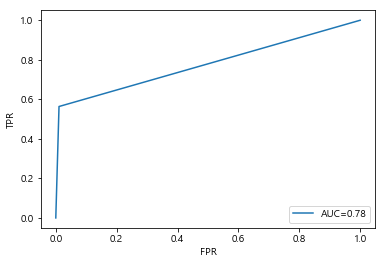

In [242]:
#gb_thr/ roc curve 그리기 ,label에 auc 표시 (소수점 2자리)
plt.plot ( fpr,tpr,label ='AUC=%0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR') ; plt.xlabel('FPR')
plt.show()

In [243]:
#gb-smote
gb_sm= GradientBoostingClassifier(learning_rate=0.15,random_state=1234,n_estimators=60, max_depth=5,min_samples_leaf =20 , min_samples_split = 40)
gb_sm.fit(x_resampled,y_resampled)

train_accuracy.append(gb_sm.score(x_resampled,y_resampled)) 
test_accuracy.append(gb_sm.score(df_test_x,df_test_y)) 

y_pred = gb_sm.predict(df_test_x)

fpr,tpr,thresholds = roc_curve(df_test_y, y_pred)
roc_auc  = auc(fpr,tpr)

model_auc.append(roc_auc)
model_f1_score.append(f1_score(df_test_y,y_pred))

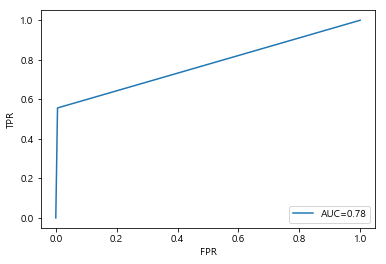

In [244]:
#gb_sm/ roc curve 그리기 ,label에 auc 표시 (소수점 2자리)
plt.plot ( fpr,tpr,label ='AUC=%0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR') ; plt.xlabel('FPR')
plt.show()

In [245]:
df_eval = pd.DataFrame(index = model)
df_eval['TrainAccuracy'] = train_accuracy
df_eval['TestAccuracy'] = test_accuracy
df_eval['F1Score'] = model_f1_score
df_eval['AUC'] = model_auc
df_eval.round(3)

,TrainAccuracy,TestAccuracy,F1Score,AUC
DT(b),0.989,0.989,0.608,0.720
DT(cw),0.989,0.989,0.608,0.720
DT(thr),0.989,0.989,0.608,0.720
DT(sm),0.829,0.986,0.610,0.777
RF(b),0.987,0.987,0.509,0.671
RF(cw),0.982,0.982,0.555,0.772
RF(thr),0.987,0.987,0.517,0.777
RF(sm),0.895,0.969,0.428,0.781
GB(b),0.989,0.989,0.620,0.732
GB(thr),0.989,0.989,0.540,0.777


In [134]:
# df_eval.reset_index(inplace=True);df_eval

,index,TrainAccuracy,TestAccuracy,F1Score,AUC
0,DT(b),0.990058,0.989482,0.686695,0.789770
1,DT(cw),0.990058,0.989482,0.686695,0.789770
2,DT(thr),0.990058,0.989482,0.686695,0.789770
3,DT(sm),0.857136,0.984151,0.646302,0.860089
4,RF(b),0.980209,0.980189,0.000000,0.500000
5,RF(cw),0.982864,0.982998,0.611842,0.832780
6,RF(thr),0.980209,0.980189,0.637138,0.835406
7,RF(sm),0.907865,0.980117,0.594118,0.859813
8,GB(b),0.991787,0.989410,0.683871,0.787952
9,GB(thr),0.991787,0.989410,0.679856,0.840256


In [135]:
# df_eval.rename(columns={'index':'name'})

,name,TrainAccuracy,TestAccuracy,F1Score,AUC
0,DT(b),0.990058,0.989482,0.686695,0.789770
1,DT(cw),0.990058,0.989482,0.686695,0.789770
2,DT(thr),0.990058,0.989482,0.686695,0.789770
3,DT(sm),0.857136,0.984151,0.646302,0.860089
4,RF(b),0.980209,0.980189,0.000000,0.500000
5,RF(cw),0.982864,0.982998,0.611842,0.832780
6,RF(thr),0.980209,0.980189,0.637138,0.835406
7,RF(sm),0.907865,0.980117,0.594118,0.859813
8,GB(b),0.991787,0.989410,0.683871,0.787952
9,GB(thr),0.991787,0.989410,0.679856,0.840256


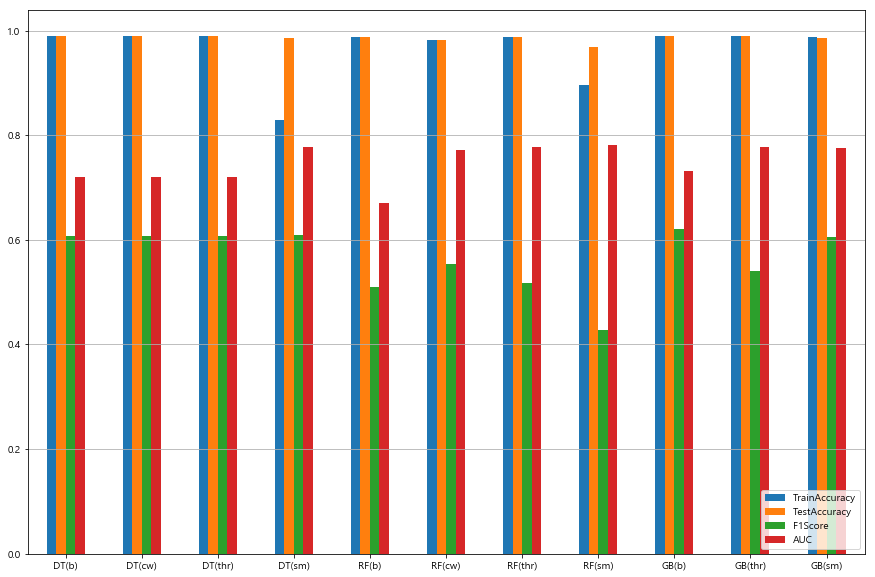

In [251]:
plt.rcParams['figure.figsize'] = [15, 10]


df_eval.plot.bar(rot=0)
plt.legend(loc='lower right')
plt.grid(axis = 'y')

## GB(THR) 에 대한 변수 중요도

In [247]:
df_c.columns

Index(['거주지', '남여구분', '판매유형', '계약유형', '유통경로', '계약기간', '납부유형', '월랜탈비용', '연체건수',
       '신용등급', '연령대', '연체여부(clean)', '해약여부(clean)'],
      dtype='object')

In [248]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = gb_thr.feature_importances_

df_importance.sort_values('Importance',ascending=False,inplace=True)
df_importance.round(3)

,Feature,Importance
4,연령대,0.339
13,남여구분_남자,0.301
0,계약기간,0.197
1,월랜탈비용,0.043
3,신용등급,0.031
14,남여구분_여자,0.012
9,거주지_서울특별시,0.010
31,유통경로_렌탈재계약,0.007
7,거주지_경기도,0.006
20,계약유형_멤버십S,0.005


Text(0, 0.5, '설명변수')

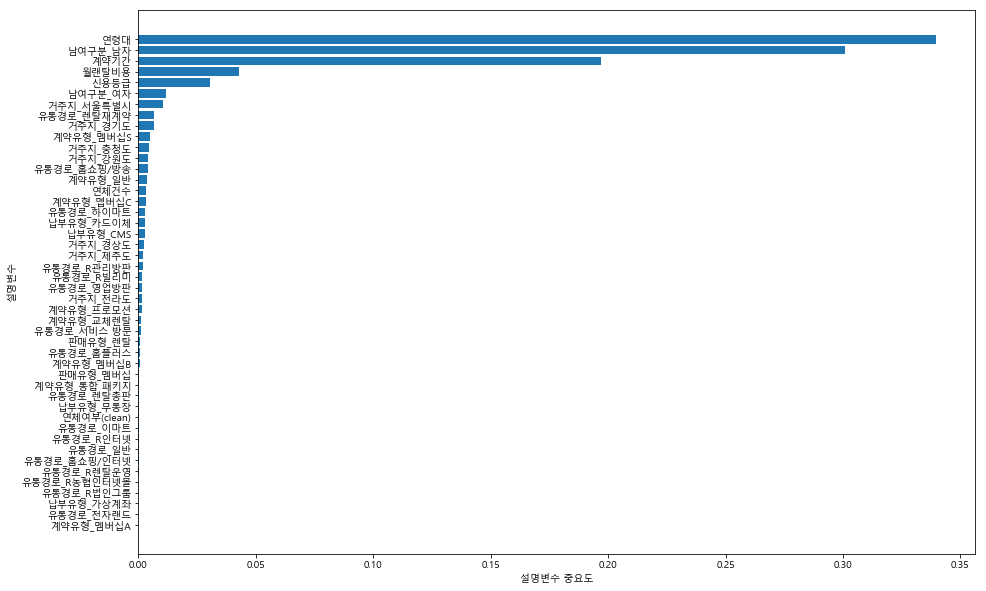

In [252]:
df_importance.sort_values("Importance",ascending=True,inplace=True)
coordinates = range(len(df_importance))
plt.barh(y=coordinates,width = df_importance['Importance'])
plt.yticks(coordinates,df_importance['Feature'])
plt.xlabel('설명변수 중요도')
plt.ylabel('설명변수')